## Drosophila Examples for Pairwise Alignment

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
import sys
sys.path.insert(0,'../')
import morpho
import matplotlib.pyplot as plt
import scanpy
import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme="onedork")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
%load_ext autoreload
%autoreload 2

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [50]:
data_dir='../data/cellbin_3D'
slice_A = scanpy.read_h5ad(os.path.join(data_dir,'E7-8h_cellbin_v1.h5ad'))
slice_B = scanpy.read_h5ad(os.path.join(data_dir,'E8-9h_cellbin_v1.h5ad'))

In [16]:
data_dir='../data/cellbin_3D'
slice_A = scanpy.read_h5ad(os.path.join(data_dir,'E8-9h_cellbin_v1.h5ad'))
slice_B = scanpy.read_h5ad(os.path.join(data_dir,'E9-10h_cellbin_v1.h5ad'))

In [17]:
slice_A_sub = slice_A[slice_A.obs['Annotation_2_tissue']=='CNS']
slice_B_sub = slice_B[slice_B.obs['Annotation_2_tissue']=='CNS']

In [58]:
# sub_num = 10000
# slice_A_sub = slice_A[np.random.choice(range(slice_A.shape[0]),sub_num)]
# slice_B_sub = slice_B[np.random.choice(range(slice_B.shape[0]),sub_num)]

align_model_A, align_model_B, P, _ = morpho.morpho_align_pairwise(
            model_ref=slice_A,
            model=slice_B,
            spatial_key="tdr_spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            n_sampling=2000,
            normalize_c=True,
            normalize_g=False,
            dissimilarity='kl',
            mode="SN",
            device="2",
            max_iter=100,
            dtype='float64',
            beta2=0.5,
            verbose=True,
            # iter_key_added=None,
            keep_size=False,
            layer='counts_X',
        )

|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 6615 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 138.61095186634145.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.7232s]
gamma: 0.99
beta2: 0.5
sigma2: 0.02456301138464427


In [54]:
sub_num = 2000
slice_A_sub = slice_A[np.random.choice(range(slice_A.shape[0]),sub_num)]
slice_B_sub = slice_B[np.random.choice(range(slice_B.shape[0]),sub_num)]
align_models, pis = morpho.models_align(
    models=[slice_A_sub,slice_B_sub],
    layer='counts_X',
    spatial_key="tdr_spatial",
    key_added="align_spatial",
    # n_sampling=10000,
    # alpha=0.001,
    device="2",
)

|-----> [Models alignment] in progress: 100.0000%|-----> Filtered all samples for common genes. There are 6615 common genes.
|-----> [Models alignment] in progress: 100.0000%
|-----> [Models alignment] finished [15.4321s]


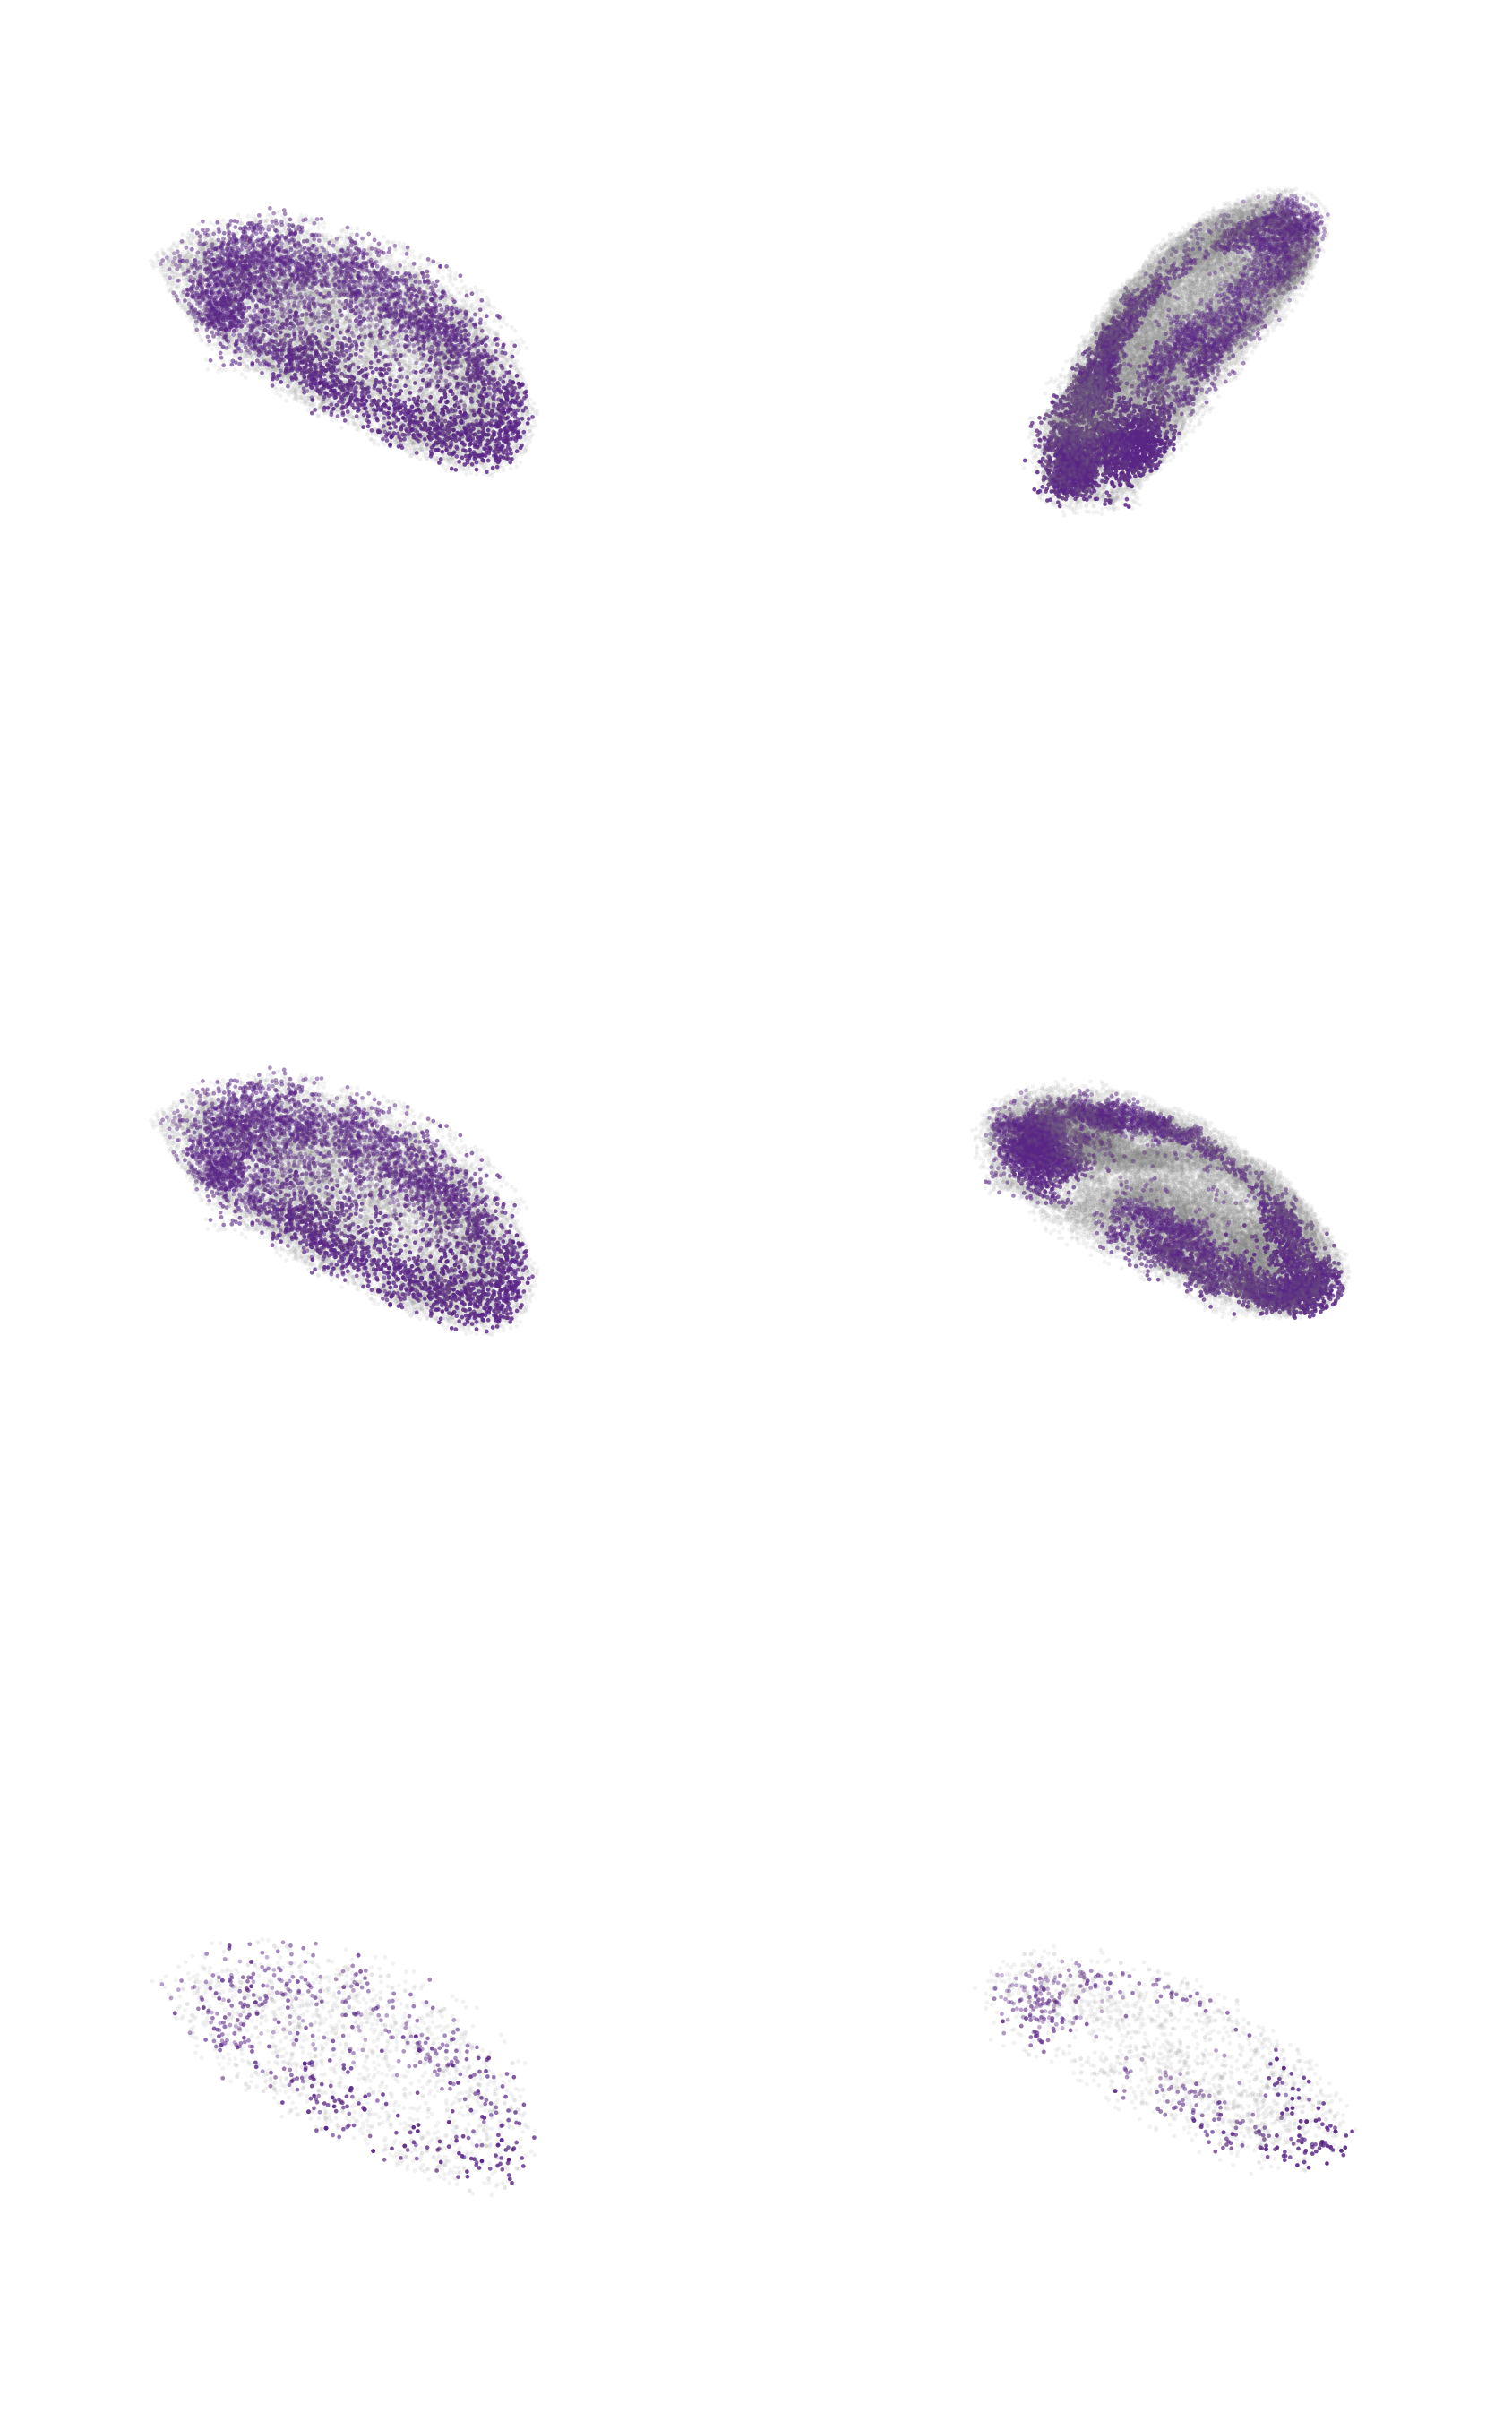

In [59]:
# %matplotlib widget
%matplotlib inline
spatial_key="tdr_spatial"
key_added="align_spatial"
%matplotlib inline
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = 60
azim = 30
s = 20
xmin, xmax = -250,250
ymin,ymax = -250,250
zmin,zmax = -250,250
cell_type_plot=slice_A.obs['Annotation_2_tissue'].cat.categories[0]
cell_type_layer = 'Annotation_2_tissue'
fig = plt.figure(figsize=(30,50),facecolor='white')
ax = fig.add_subplot(3,2,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,2,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')

ax = fig.add_subplot(3,2,3,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,4,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,5,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)    
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,6,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
    
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
plt.show()

KeyError: 'iter_spatial'

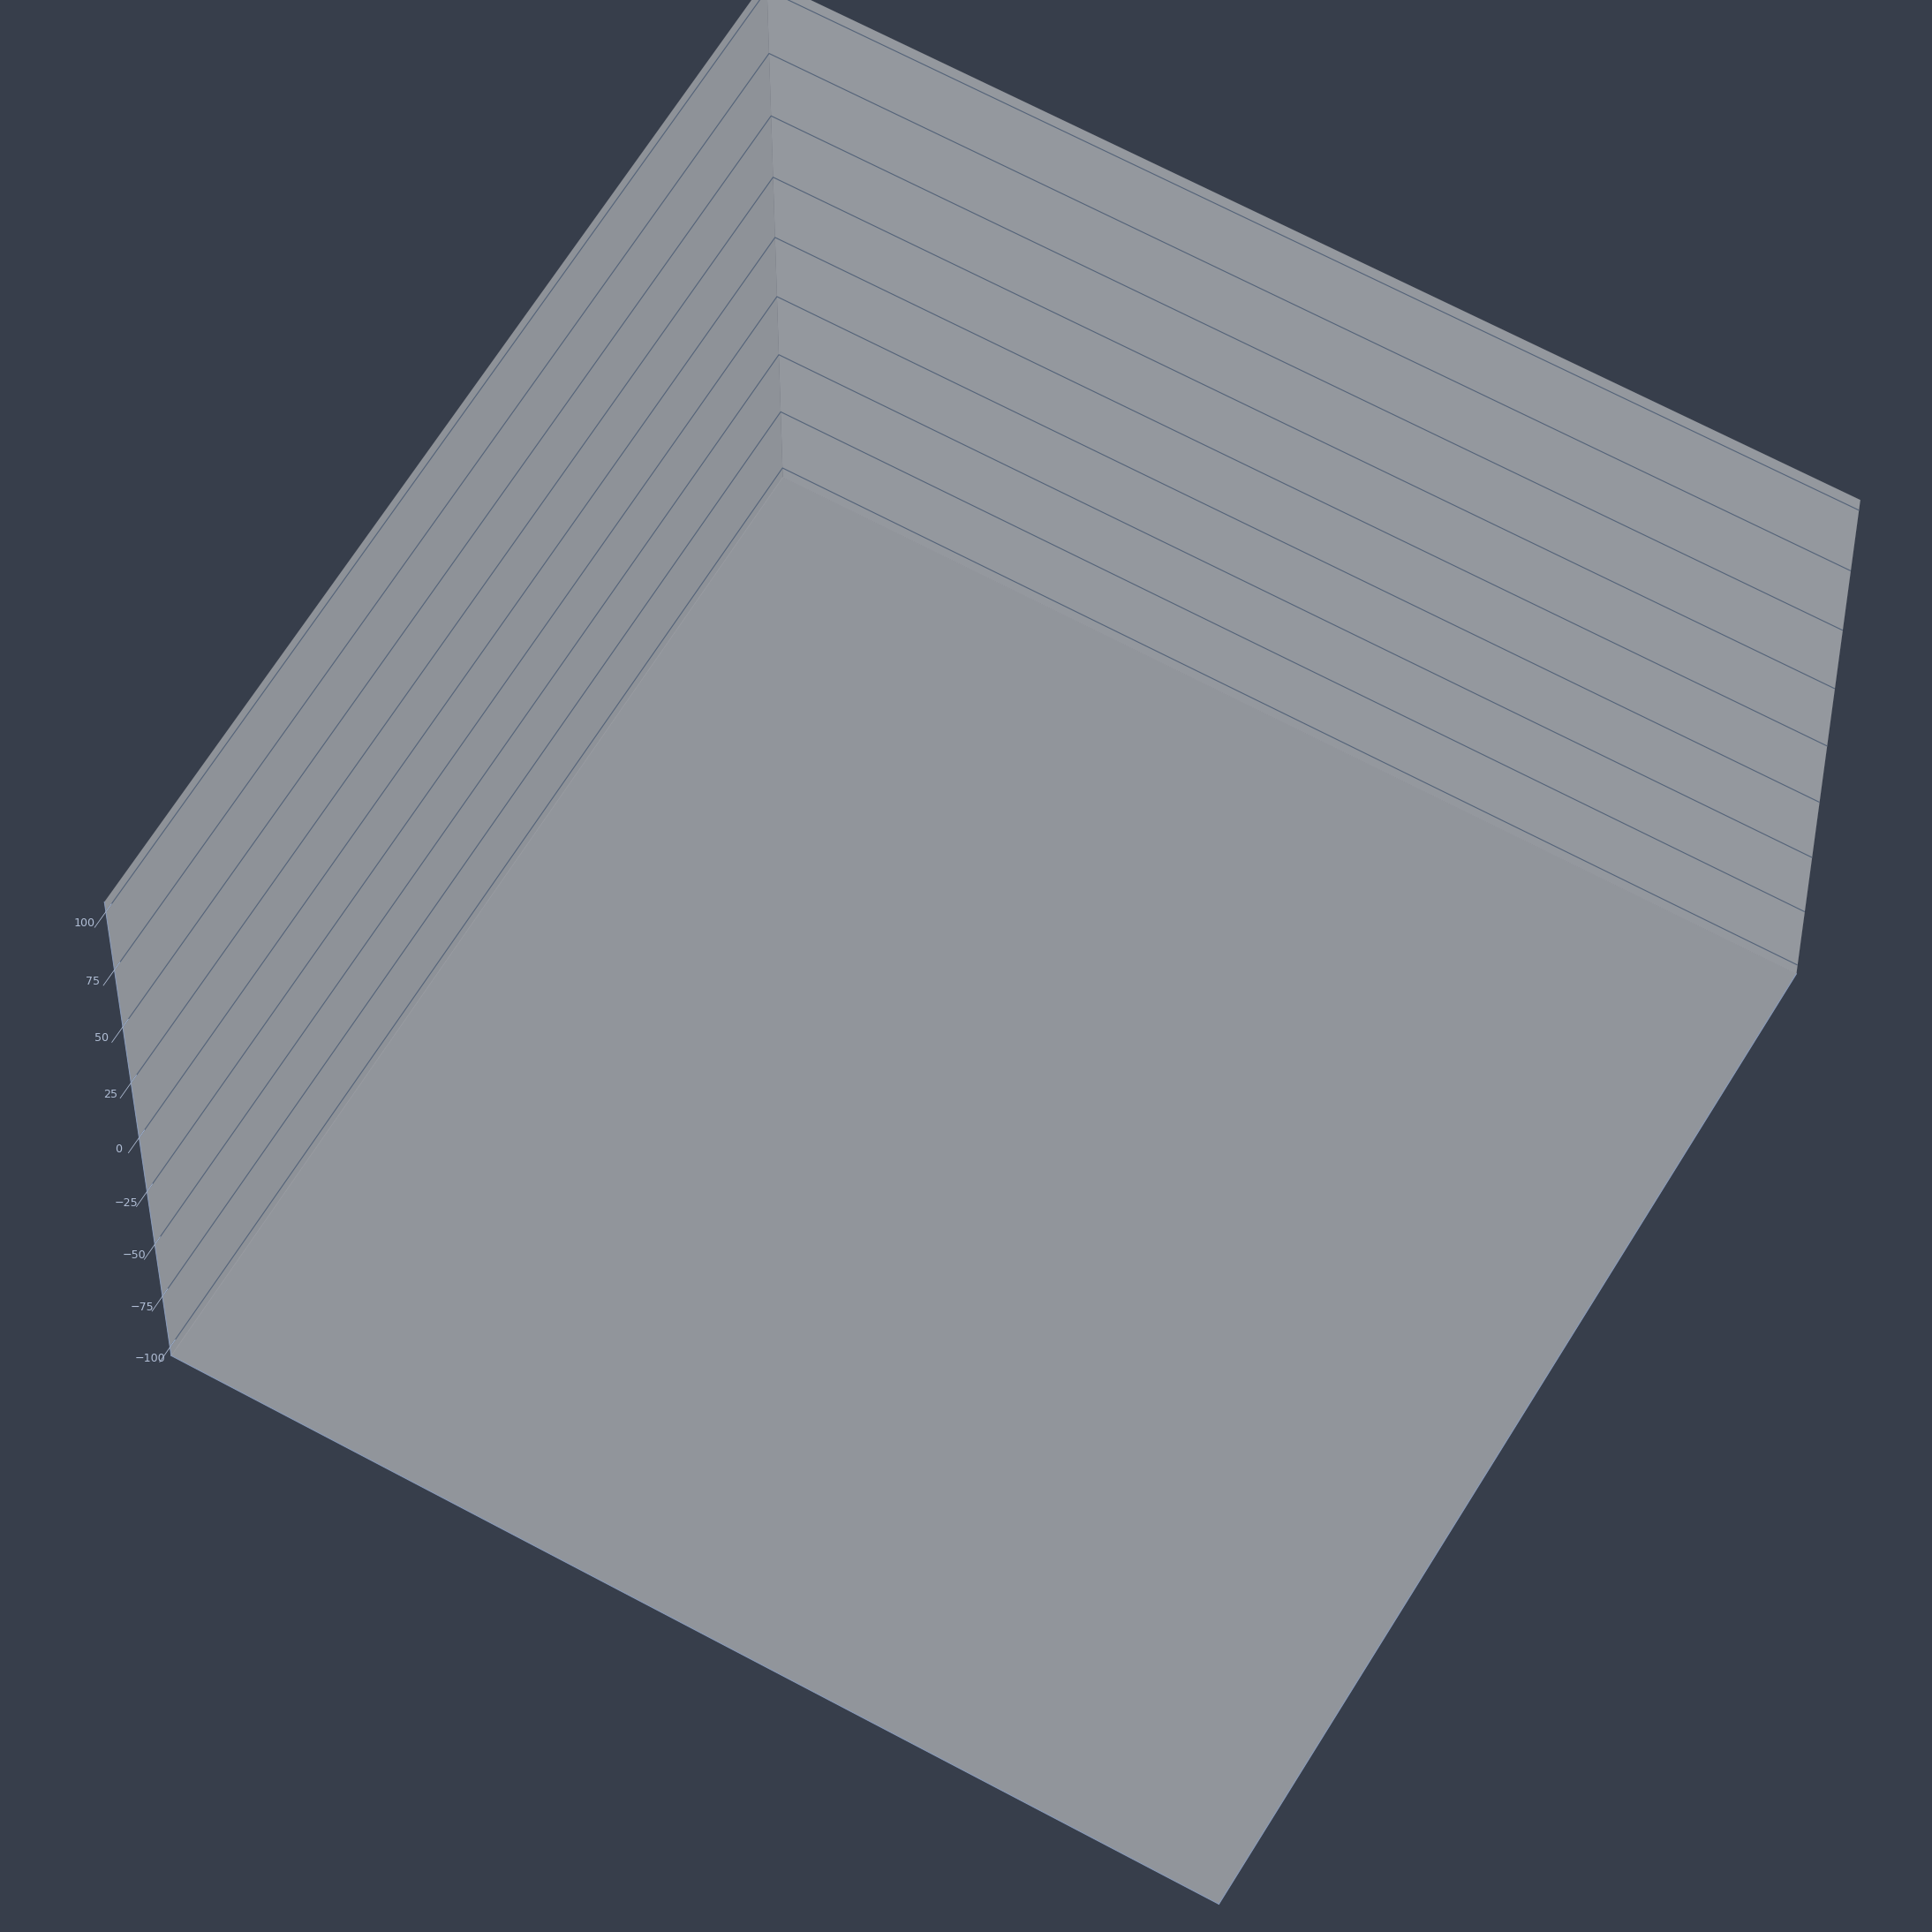

In [60]:
morpho.three_d_pairwise_animate(
    model_ref=align_model_A,
    model=align_model_B,
    spatial_key="tdr_spatial",
    fps=5,
    elev = 60,
    azim = 30,
)

In [61]:
data_dir='../data/cellbin_3D'
slice_A = scanpy.read_h5ad(os.path.join(data_dir,'E8-9h_cellbin_v1.h5ad'))
slice_B = scanpy.read_h5ad(os.path.join(data_dir,'E9-10h_cellbin_v1.h5ad'))
sub_num = 10000
slice_A_sub = slice_A[np.random.choice(range(slice_A.shape[0]),sub_num)]
slice_B_sub = slice_B[np.random.choice(range(slice_B.shape[0]),sub_num)]
align_model_A, align_model_B, P, _ = morpho.morpho_align_pairwise(
            model_ref=slice_A,
            model=slice_B,
            spatial_key="tdr_spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            n_sampling=2000,
            normalize_c=True,
            normalize_g=False,
            dissimilarity='kl',
            mode="SN",
            device="2",
            max_iter=100,
            dtype='float64',
            beta2=0.5,
            verbose=True,
            # iter_key_added=None,
            keep_size=False,
            layer='counts_X',
        )

# align_models, pis = morpho.models_align(
#     models=[slice_A_sub,slice_B_sub],
#     # layer='counts_X',
#     spatial_key="tdr_spatial",
#     key_added="align_spatial",
#     device="2",
# )


|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 7894 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 135.84510223197108.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.7055s]
gamma: 0.99
beta2: 0.5
sigma2: 0.022830340701885637


In [74]:
import anndata
save_dir = '../data/results_cellbin_3D/'
align_model_A.write_h5ad(save_dir + 'E8-9_E9-10_A.h5ad')
align_model_B.write_h5ad(save_dir + 'E8-9_E9-10_B.h5ad')

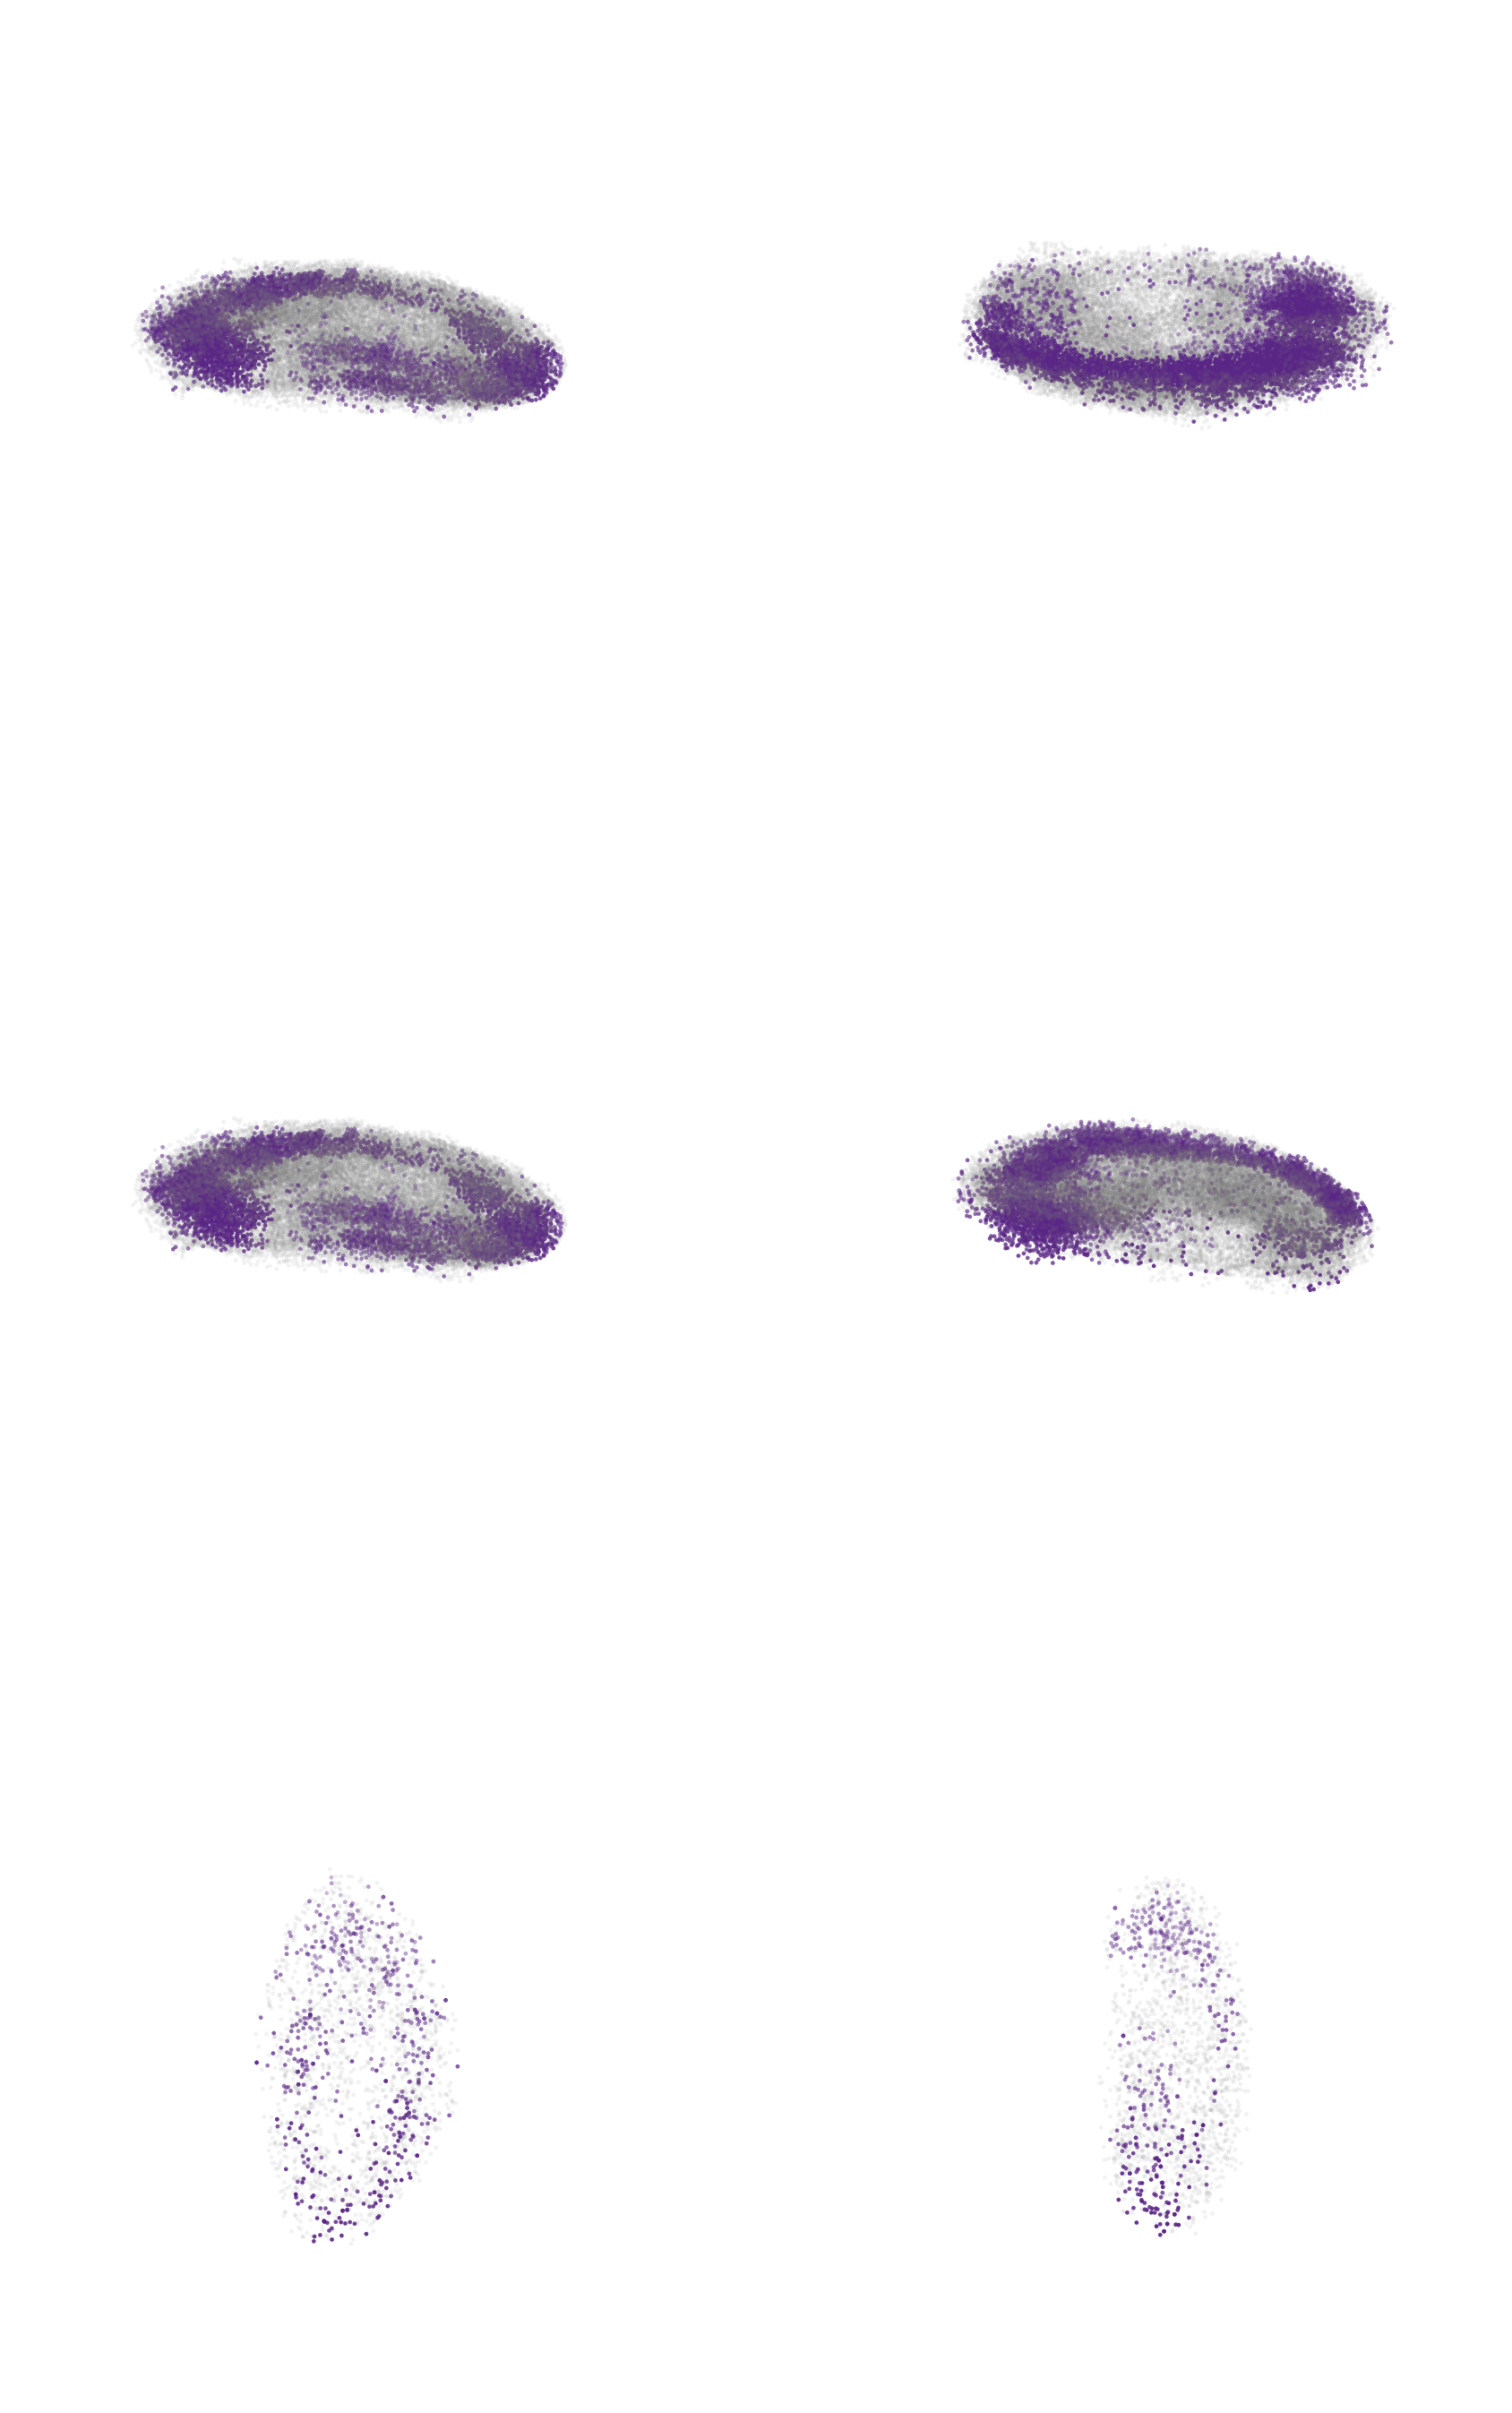

In [62]:
# %matplotlib widget
%matplotlib inline
spatial_key="tdr_spatial"
key_added="align_spatial"
%matplotlib inline
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = 60
azim = 90
s = 20
xmin, xmax = -250,250
ymin,ymax = -250,250
zmin,zmax = -250,250
cell_type_plot=slice_A.obs['Annotation_2_tissue'].cat.categories[0]
cell_type_layer = 'Annotation_2_tissue'
fig = plt.figure(figsize=(30,50),facecolor='white')
ax = fig.add_subplot(3,2,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,2,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')

ax = fig.add_subplot(3,2,3,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,4,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,5,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)    
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,6,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
    
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
plt.show()

In [63]:
data_dir='../data/cellbin_3D'
slice_A = scanpy.read_h5ad(os.path.join(data_dir,'E9-10h_cellbin_v1.h5ad'))
slice_B = scanpy.read_h5ad(os.path.join(data_dir,'E13-14h_cellbin_v1.h5ad'))
sub_num = 10000
slice_A_sub = slice_A[np.random.choice(range(slice_A.shape[0]),sub_num)]
slice_B_sub = slice_B[np.random.choice(range(slice_B.shape[0]),sub_num)]
align_model_A, align_model_B, P, _ = morpho.morpho_align_pairwise(
            model_ref=slice_A,
            model=slice_B,
            spatial_key="tdr_spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            n_sampling=2000,
            normalize_c=True,
            normalize_g=False,
            dissimilarity='kl',
            mode="SN",
            device="2",
            max_iter=100,
            dtype='float64',
            beta2=0.5,
            verbose=True,
            # iter_key_added=None,
            keep_size=False,
            layer='counts_X',
        )

# align_models, pis = morpho.models_align(
#     models=[slice_A_sub,slice_B_sub],
#     # layer='counts_X',
#     spatial_key="tdr_spatial",
#     key_added="align_spatial",
#     device="2",
# )


|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 8056 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 132.43783496219964.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.7287s]
gamma: 0.99
beta2: 0.5
sigma2: 0.014718474755517538


In [77]:
import anndata
save_dir = '../data/results_cellbin_3D/'
align_model_A.write_h5ad(save_dir + 'E9-10_E13-14_A.h5ad')
align_model_B.write_h5ad(save_dir + 'E9-10_E13-14_B.h5ad')

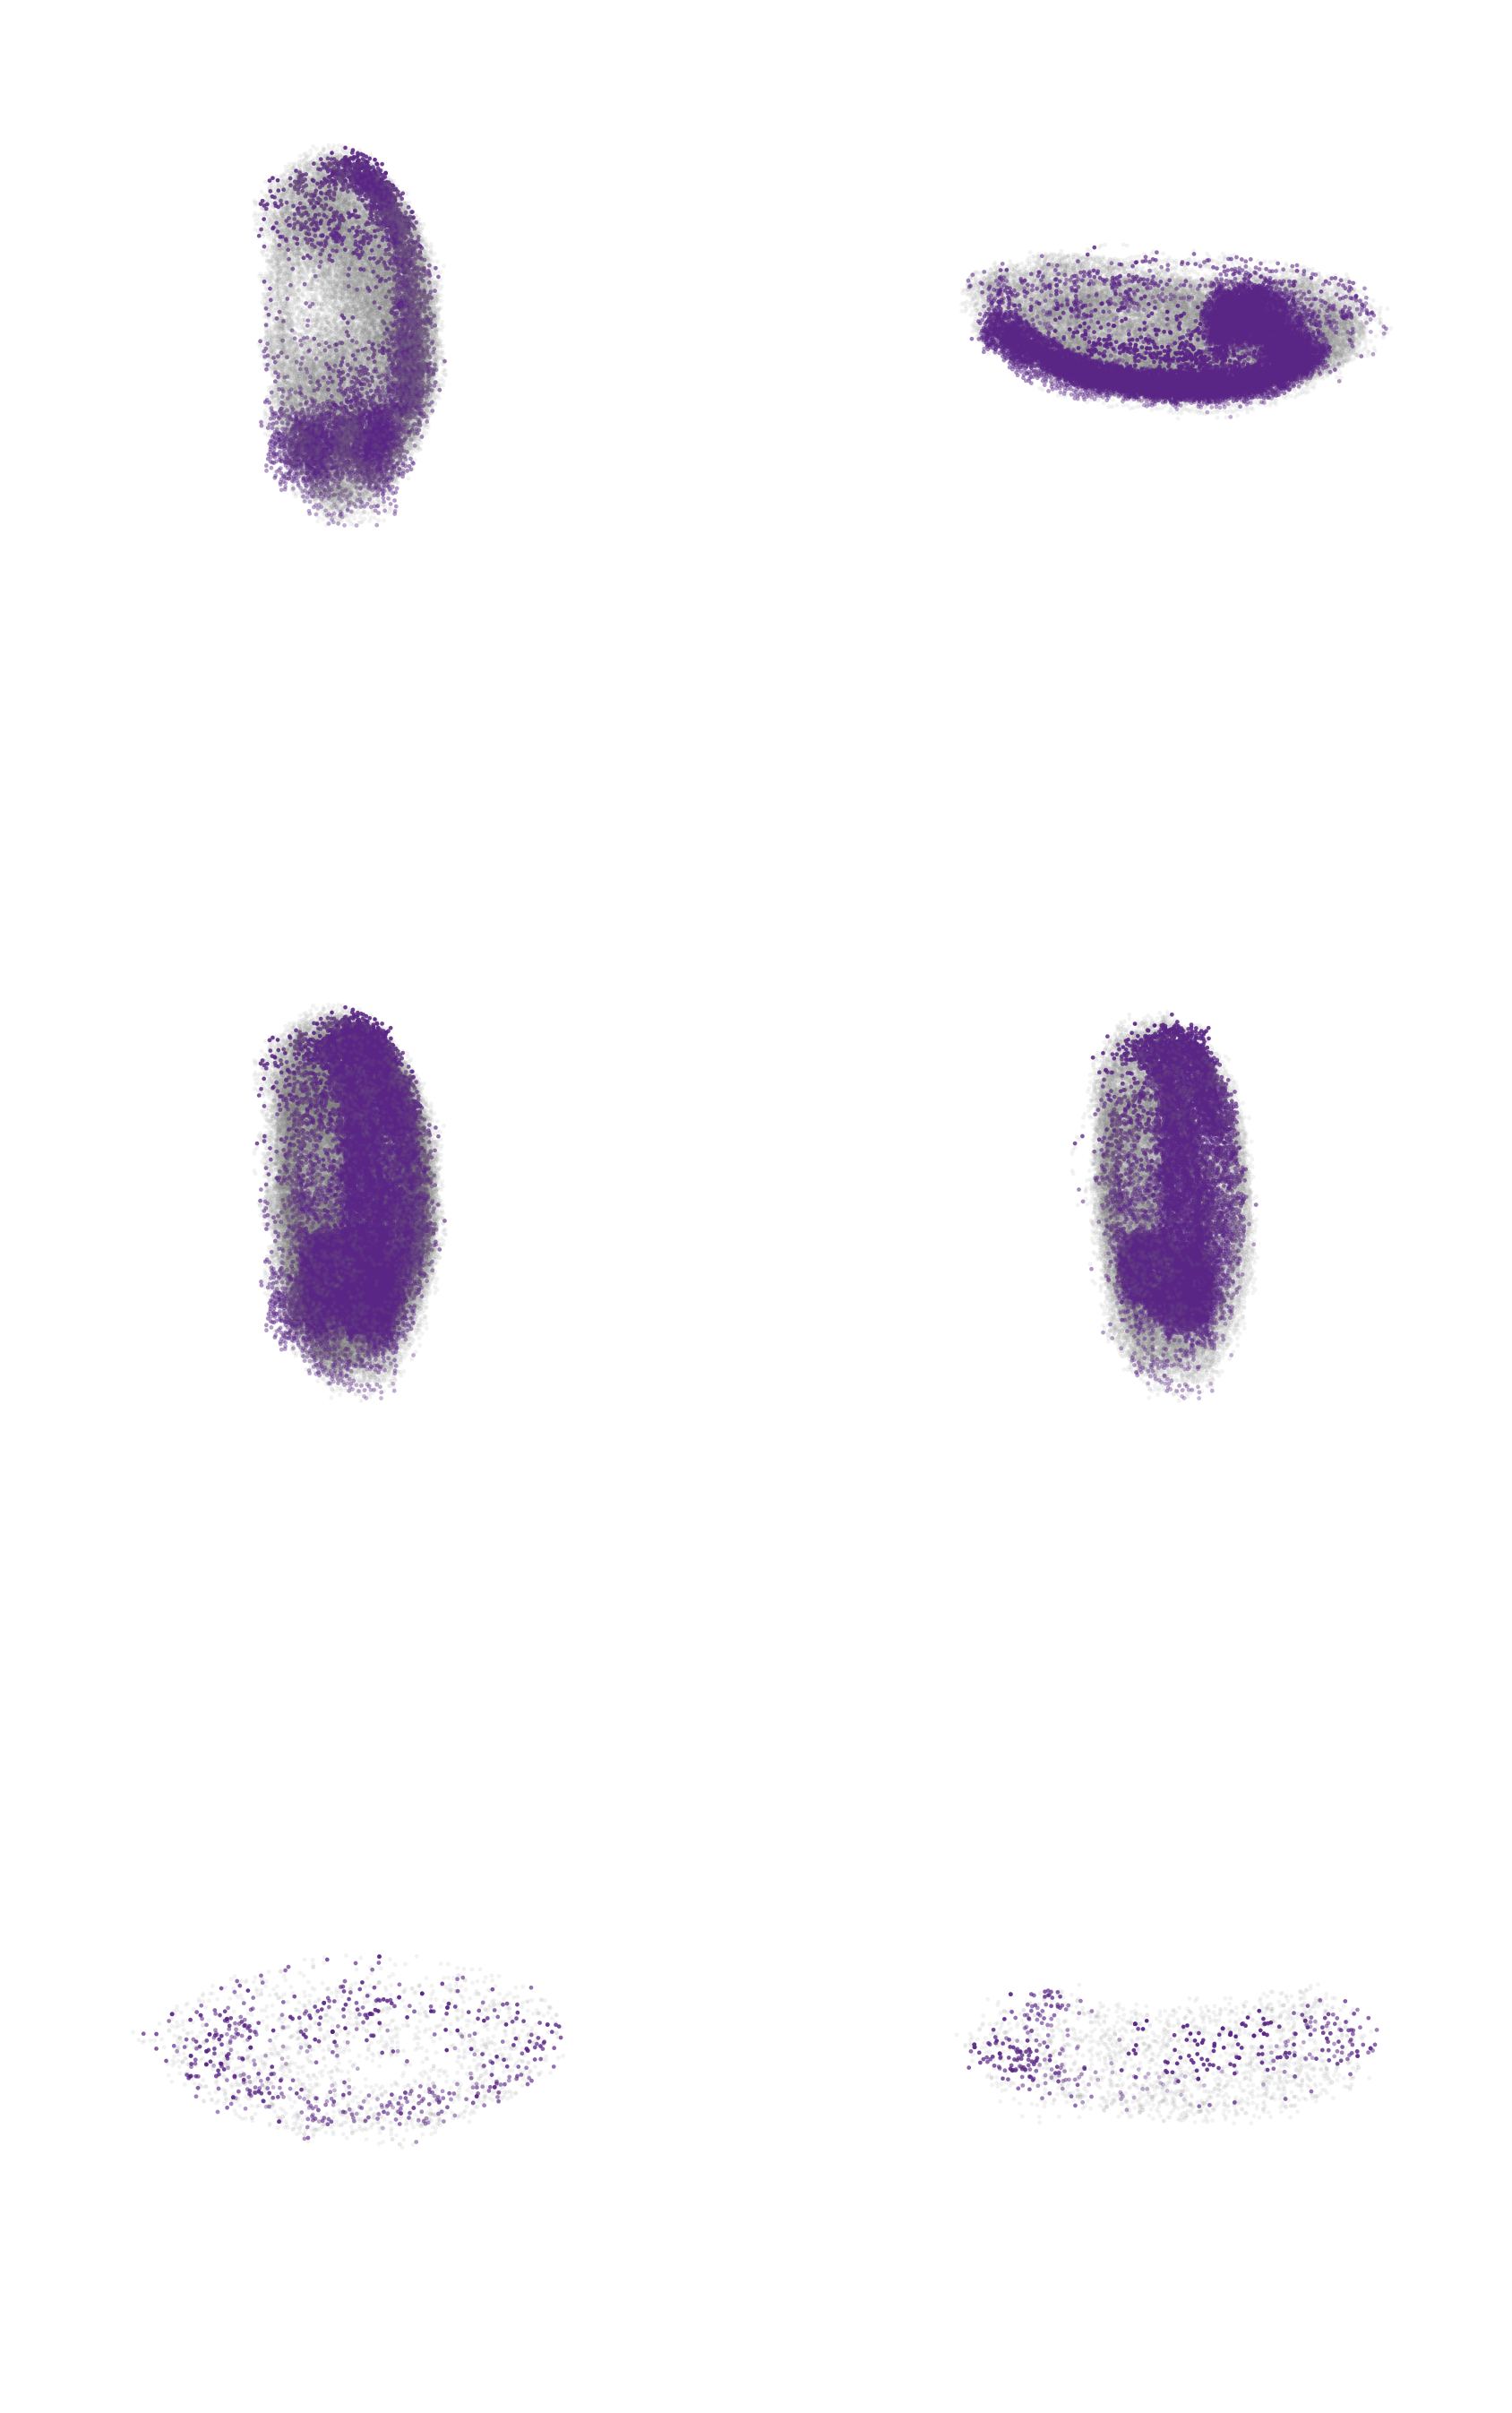

In [64]:
# %matplotlib widget
%matplotlib inline
spatial_key="tdr_spatial"
key_added="align_spatial"
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = -60
azim = 0
s = 20
xmin, xmax = -250,250
ymin,ymax = -250,250
zmin,zmax = -250,250
cell_type_plot=slice_A.obs['Annotation_2_tissue'].cat.categories[0]
cell_type_layer = 'Annotation_2_tissue'
fig = plt.figure(figsize=(30,50),facecolor='white')
ax = fig.add_subplot(3,2,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,2,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')

ax = fig.add_subplot(3,2,3,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)

for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,4,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,5,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)    
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,6,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
    
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
plt.show()

In [85]:
data_dir='../data/cellbin_3D'
slice_A = scanpy.read_h5ad(os.path.join(data_dir,'E13-14h_cellbin_v1.h5ad'))
slice_B = scanpy.read_h5ad(os.path.join(data_dir,'E15-16h_cellbin_v1.h5ad'))
sub_num = 10000
slice_A_sub = slice_A[np.random.choice(range(slice_A.shape[0]),sub_num)]
slice_B_sub = slice_B[np.random.choice(range(slice_B.shape[0]),sub_num)]
align_model_A, align_model_B, P, _ = morpho.morpho_align_pairwise(
            model_ref=slice_A,
            model=slice_B,
            spatial_key="tdr_spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            n_sampling=10000,
            normalize_c=True,
            normalize_g=False,
            dissimilarity='kl',
            mode="SN",
            device="2",
            max_iter=100,
            dtype='float64',
            beta2=1,
            verbose=True,
            # iter_key_added=None,
            keep_size=False,
            layer='counts_X',
        )

# align_models, pis = morpho.models_align(
#     models=[slice_A_sub,slice_B_sub],
#     # layer='counts_X',
#     spatial_key="tdr_spatial",
#     key_added="align_spatial",
#     device="2",
# )


|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 9047 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 128.51397766560208.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [6.6345s]
gamma: 0.99
beta2: 1
sigma2: 0.00925922234166092
|-----> [Models alignment] in progress: 100.0000%|-----> Filtered all samples for common genes. There are 9047 common genes.


RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is v

|-----> [Models alignment] in progress: 100.0000%
|-----> [Models alignment] finished [90.9727s]


In [88]:
import anndata
save_dir = '../data/results_cellbin_3D/'
align_model_A.write_h5ad(save_dir + 'E13-14_E15-16_A.h5ad')
align_model_B.write_h5ad(save_dir + 'E13-14_E15-16_B.h5ad')

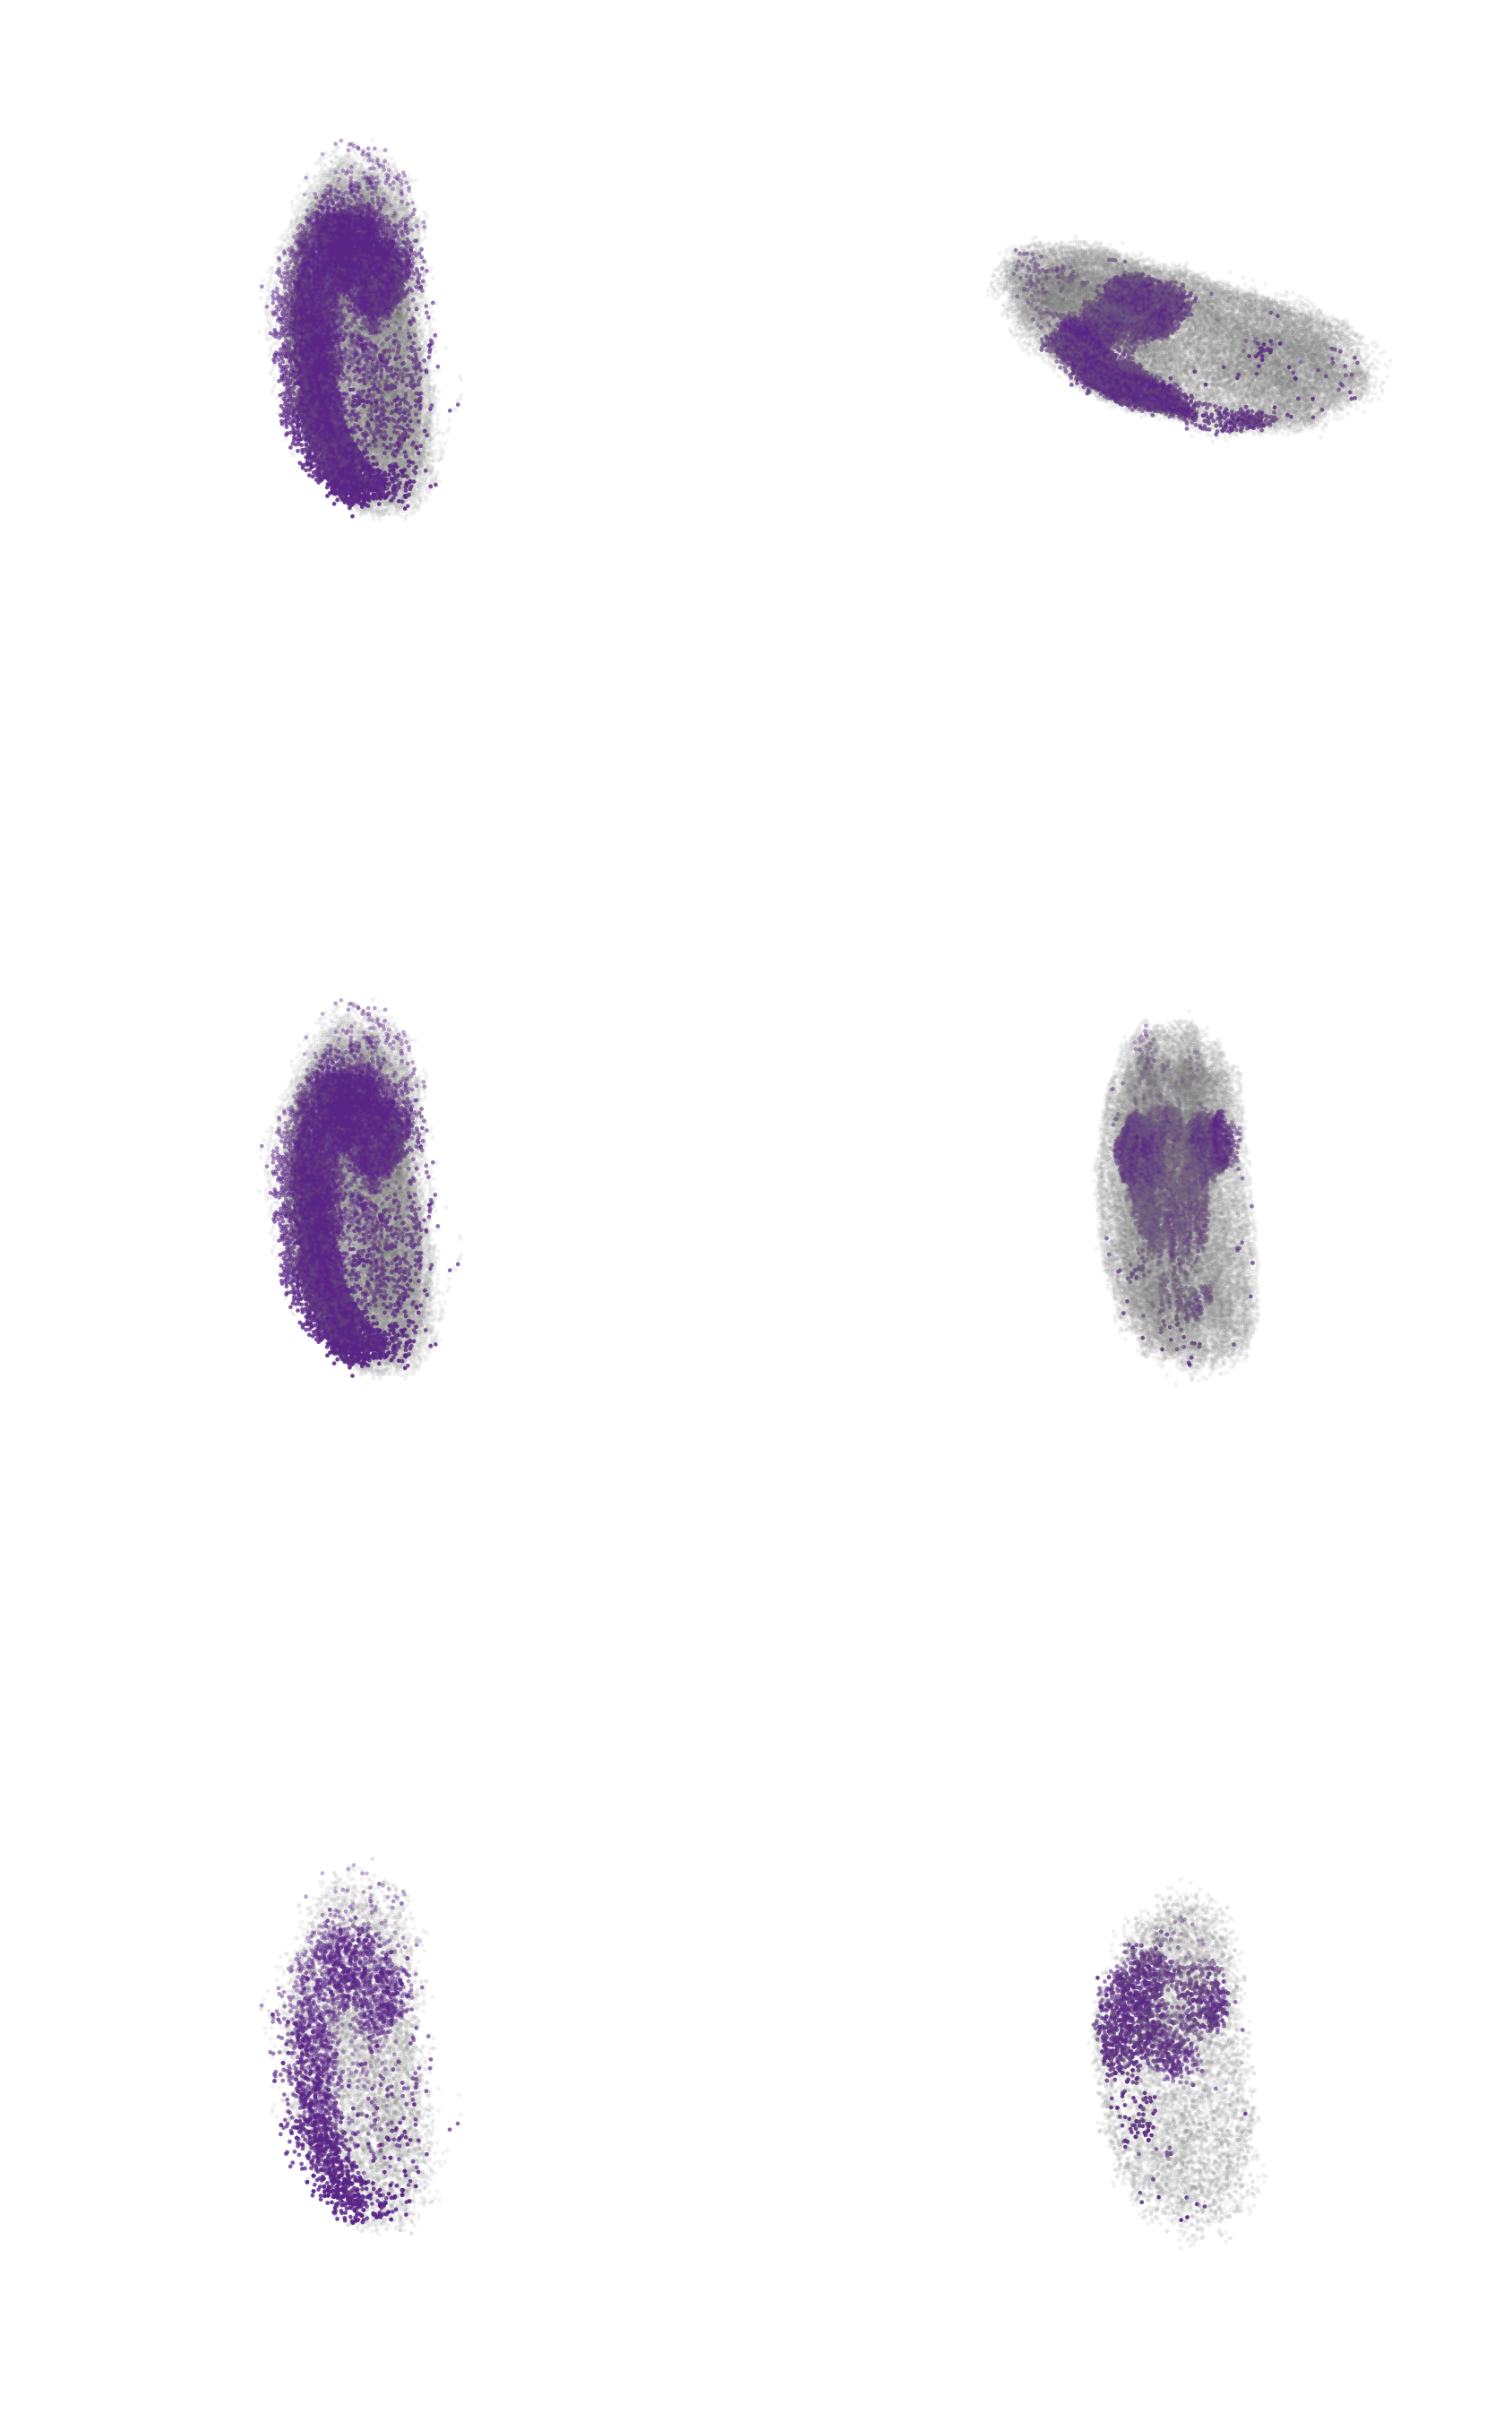

In [86]:
# %matplotlib widget
%matplotlib inline
spatial_key="tdr_spatial"
key_added="align_spatial"
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = 60
azim = -90
s = 20
xmin, xmax = -250,250
ymin,ymax = -250,250
zmin,zmax = -250,250
cell_type_plot=slice_A.obs['Annotation_2_tissue'].cat.categories[0]
cell_type_layer = 'Annotation_2_tissue'
fig = plt.figure(figsize=(30,50),facecolor='white')
ax = fig.add_subplot(3,2,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,2,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')

ax = fig.add_subplot(3,2,3,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,4,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,5,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)    
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,6,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
    
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
plt.show()

In [81]:
data_dir='../data/cellbin_3D'
slice_A = scanpy.read_h5ad(os.path.join(data_dir,'E15-16h_cellbin_v1.h5ad'))
slice_B = scanpy.read_h5ad(os.path.join(data_dir,'E16-17h_cellbin_v1.h5ad'))
sub_num = 10000
slice_A_sub = slice_A[np.random.choice(range(slice_A.shape[0]),sub_num)]
slice_B_sub = slice_B[np.random.choice(range(slice_B.shape[0]),sub_num)]
align_model_A, align_model_B, P, _ = morpho.morpho_align_pairwise(
            model_ref=slice_A,
            model=slice_B,
            spatial_key="tdr_spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=False,
            dissimilarity='kl',
            n_sampling=2000,
            mode="SN",
            device="1",
            max_iter=100,
            dtype='float64',
            beta2=0.5,
            verbose=True,
            iter_key_added=None,
            keep_size=False,
            layer='counts_X',
        )

# align_models, pis = morpho.models_align(
#     models=[slice_A_sub,slice_B_sub],
#     # layer='counts_X',
#     spatial_key="tdr_spatial",
#     key_added="align_spatial",
#     device="1",
# )


|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 9143 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 125.42502949047054.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.9811s]
gamma: 0.99
beta2: 0.5
sigma2: 0.01041596828679006


KeyError: 'iter_spatial'

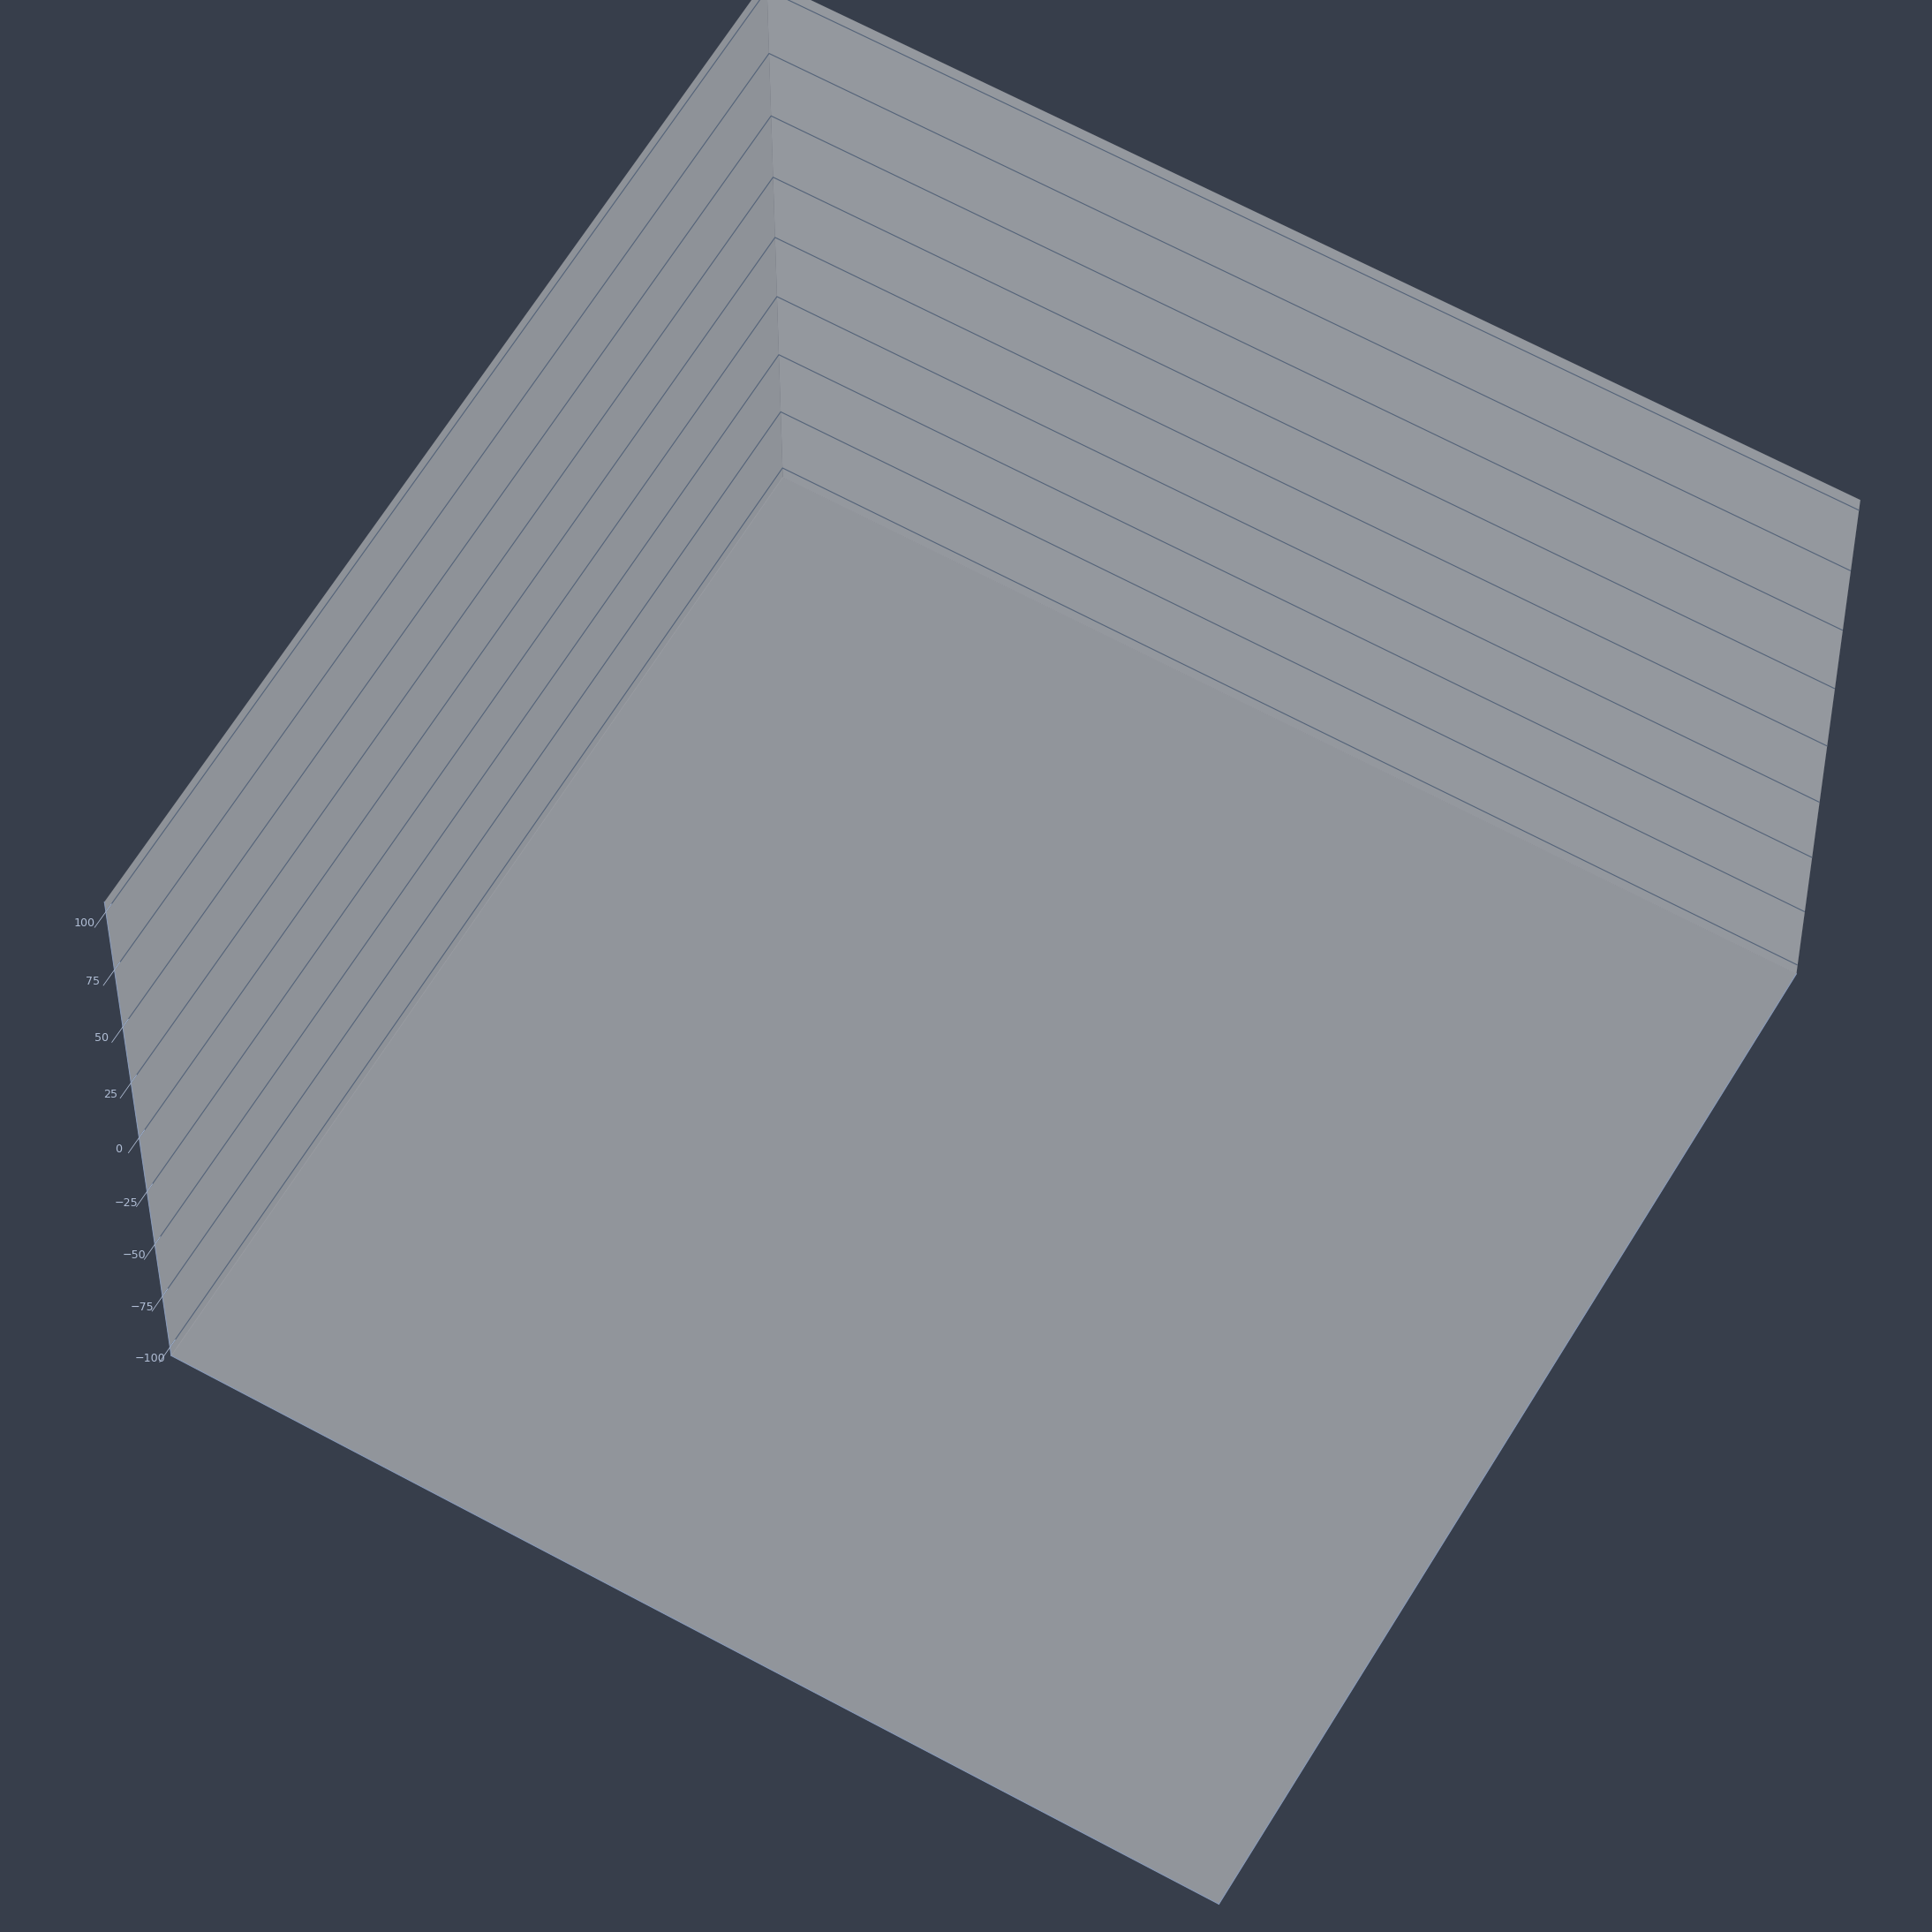

In [77]:
morpho.three_d_pairwise_animate(
    model_ref=align_model_A,
    model=align_model_B,
    spatial_key="tdr_spatial",
    fps=5,
    elev = 60,
    azim = 30,
)

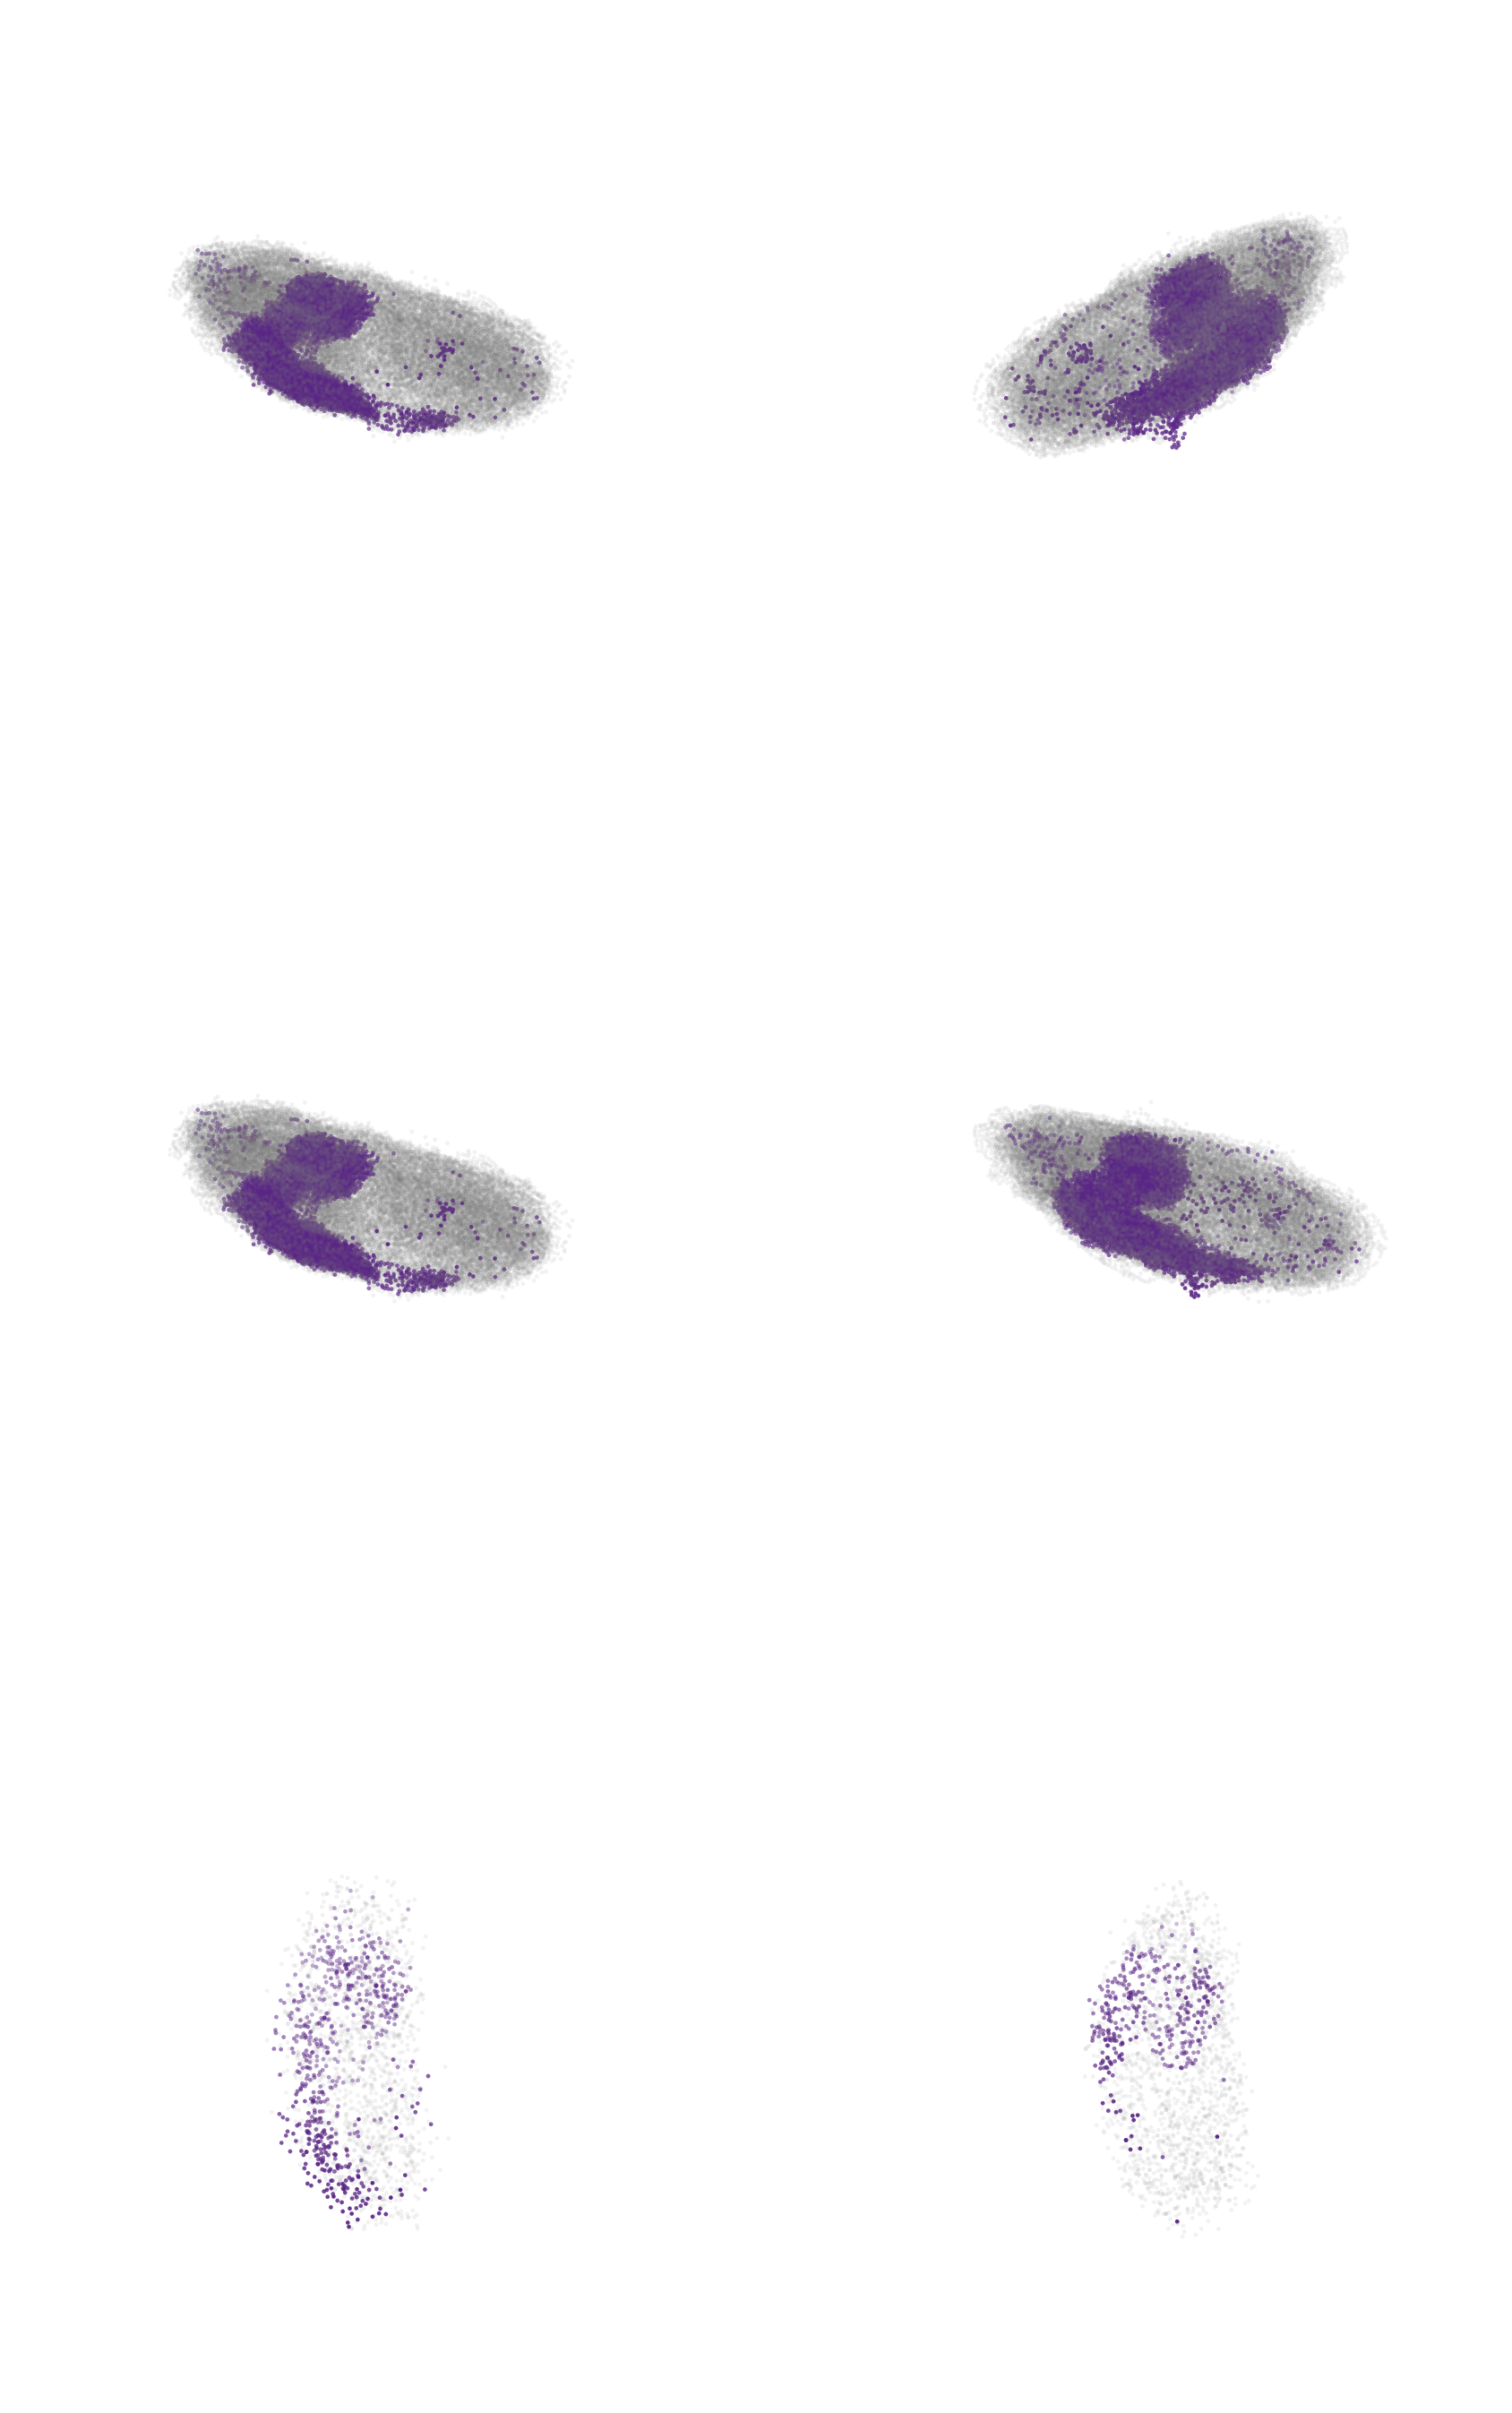

In [82]:
# %matplotlib widget
%matplotlib inline
spatial_key="tdr_spatial"
key_added="align_spatial"
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = 60
azim = -90
s = 20
xmin, xmax = -250,250
ymin,ymax = -250,250
zmin,zmax = -250,250
cell_type_plot=slice_A.obs['Annotation_2_tissue'].cat.categories[0]
cell_type_layer = 'Annotation_2_tissue'
fig = plt.figure(figsize=(30,50),facecolor='white')
ax = fig.add_subplot(3,2,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_A[slice_A.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,2,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,0],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,1],slice_B[slice_B.obs[cell_type_layer]==cell_type].obsm[spatial_key][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')

ax = fig.add_subplot(3,2,3,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[align_model_A.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,4,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[align_model_B.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,5,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[0][align_models[0].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)    
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
ax = fig.add_subplot(3,2,6,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A.obs[cell_type_layer].cat.categories):
    if cell_type == cell_type_plot:
        ax.scatter(align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    else:
        ax.scatter(align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[1][align_models[1].obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,color=[0.5,0.5,0.5],alpha=0.1)
    
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax.set_facecolor('white')
plt.show()

(-250.0, 250.0, -250.0, 250.0)

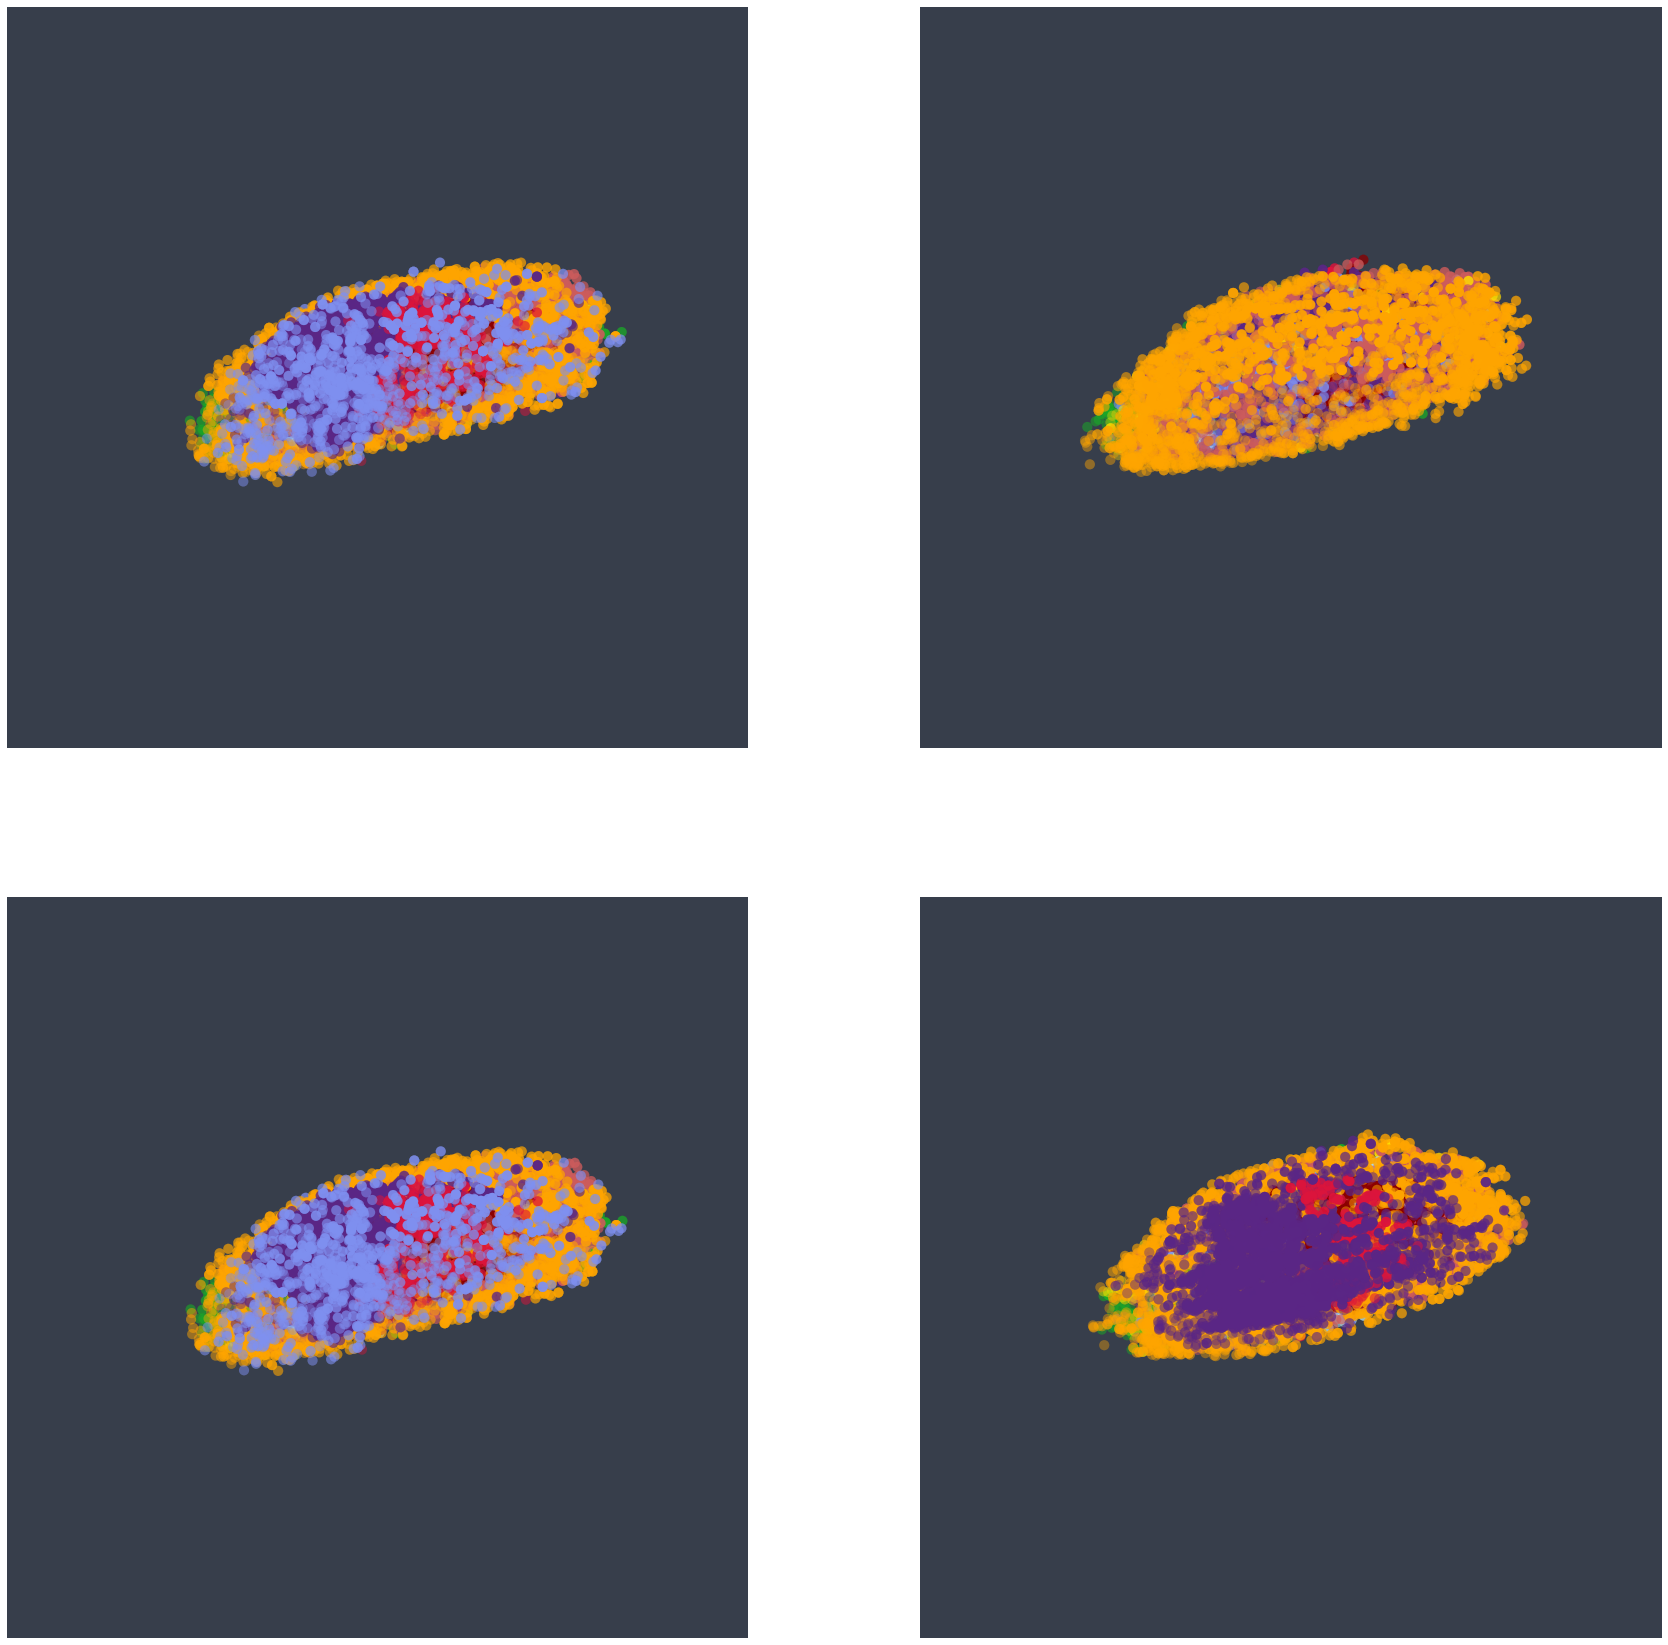

In [24]:
# %matplotlib widget
%matplotlib inline
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = -60
azim = -90
s = 100
xmin, xmax = -250,250
ymin,ymax = -250,250
zmin,zmax = -250,250
# cell_type=slice_A_sub.obs['Annotation_1_cell_type'].cat.categories[6]
cell_type_layer = 'Annotation_2_tissue'
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(2,2,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax = fig.add_subplot(2,2,2,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    ax.scatter(align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax = fig.add_subplot(2,2,3,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    ax.scatter(align_models[0][slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[0][slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[0][slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')
ax = fig.add_subplot(2,2,4,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    ax.scatter(align_models[1][slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[1][slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[1][slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
ax.set_zlim([zmin,zmax])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.axis('off')

In [25]:
morpho.three_d_pairwise_animate(
    model_ref=align_model_A,
    model=align_model_B,
    spatial_key="tdr_spatial",
    fps=5,
)

|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.0977s]


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [26]:
morpho.three_d_pairwise_animate_tissue(
    model_ref=align_model_A,
    model=align_model_B,
    spatial_key="tdr_spatial",
    cell_type_plot=slice_A_sub.obs['Annotation_2_tissue'].cat.categories[0],
)

|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [2.0041s]
here


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f29938a2820> (for post_execute):


KeyboardInterrupt: 

: 

(-150.0, 150.0)

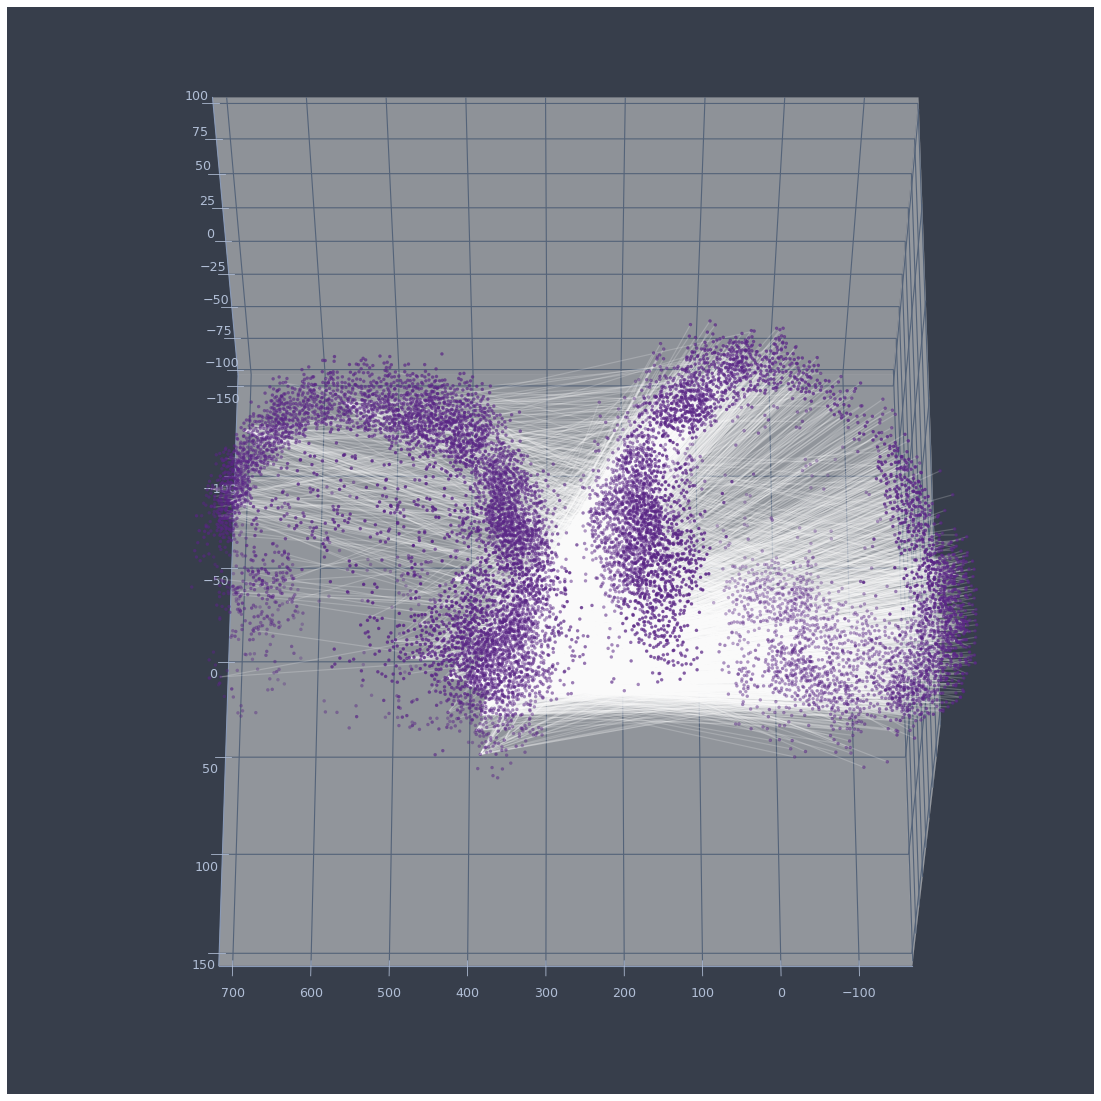

In [42]:
# %matplotlib widget
%matplotlib inline
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = 60
azim = 90
s = 10
# cell_type=slice_A_sub.obs['Annotation_1_cell_type'].cat.categories[6]
cell_type_layer = 'Annotation_2_tissue'
fig = plt.figure(figsize=(80,20))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    ax.scatter(align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_A[slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    ax.scatter(500+align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
for i in range(align_model_A.obsm['align_spatial'].shape[0]):
    max_index = np.argmax(P[:,i])
    ax.plot([align_model_A.obsm['align_spatial'][i,0],align_model_B.obsm['align_spatial'][max_index,0] + 500],[align_model_A.obsm['align_spatial'][i,1],align_model_B.obsm['align_spatial'][max_index,1]],[align_model_A.obsm['align_spatial'][i,2],align_model_B.obsm['align_spatial'][max_index,2]],'w-',alpha=0.2)
ax.set_zlim([-100,100])
ax.set_xlim([-150,700])
ax.set_ylim([-150,150])
# ax = fig.add_subplot(2,2,2,projection='3d')
# ax.view_init(elev=elev, azim=azim)
# for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
#     ax.scatter(align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_model_B[slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
# ax.set_zlim([-100,100])
# ax.set_xlim([-150,150])
# ax.set_ylim([-150,150])

# ax = fig.add_subplot(2,2,3,projection='3d')
# ax.view_init(elev=elev, azim=azim)
# for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
#     ax.scatter(align_models[0][slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[0][slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[0][slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
# ax.set_zlim([-100,100])
# ax.set_xlim([-150,150])
# ax.set_ylim([-150,150])
# ax = fig.add_subplot(2,2,4,projection='3d')
# ax.view_init(elev=elev, azim=azim)
# for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
#     ax.scatter(align_models[1][slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[1][slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[1][slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
# ax.set_zlim([-100,100])
# ax.set_xlim([-150,150])
# ax.set_ylim([-150,150])


(-150.0, 150.0)

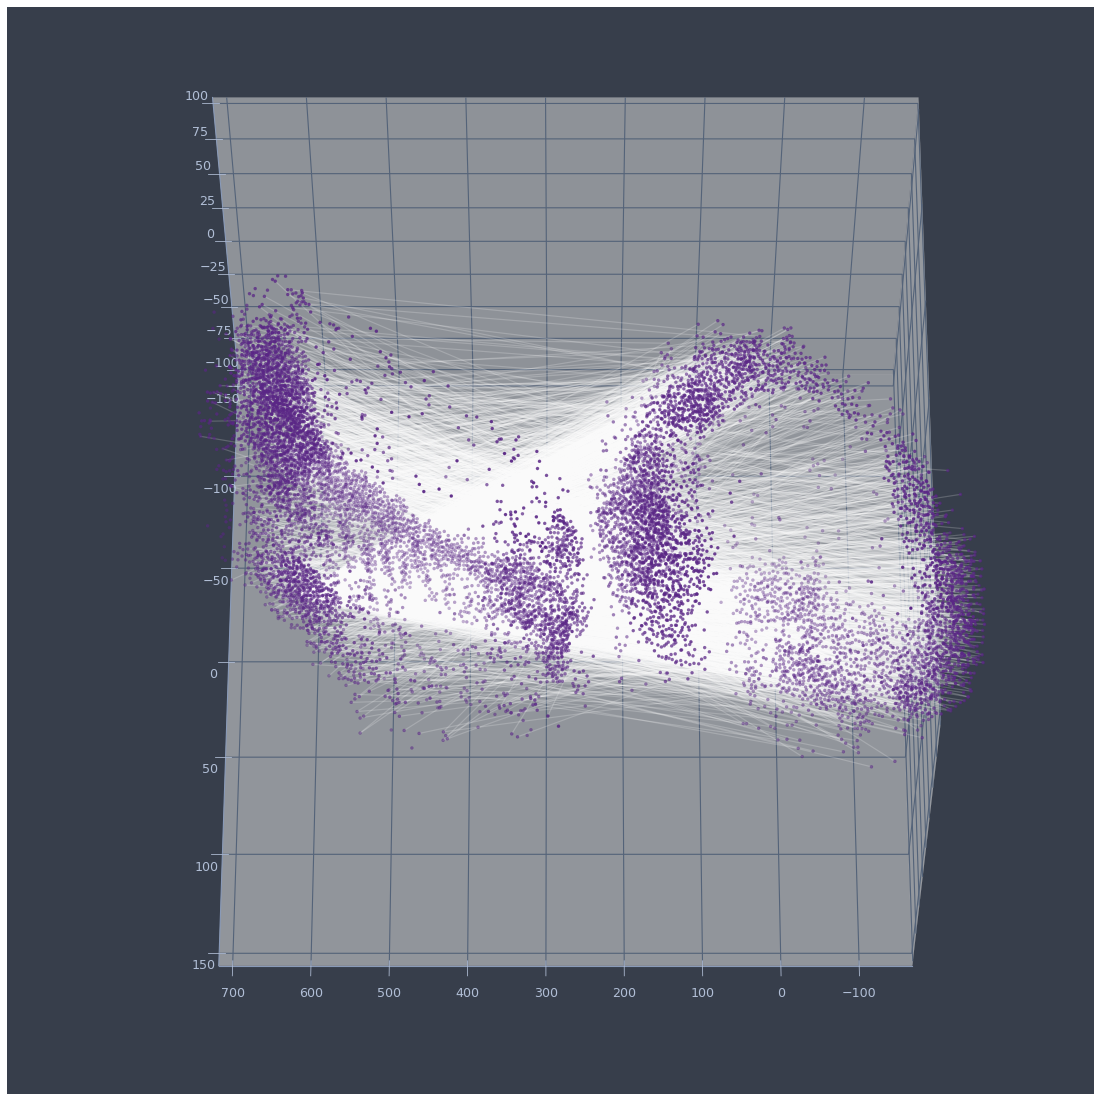

In [43]:
# %matplotlib widget
%matplotlib inline
colormap = [
    "#5A2686",
    "#DC143C",
    "#FFDD00",
    "#FFA500",
    "#ADD8E6",
    "#1AAB27",
    "#7F90F0",
    "#CD5C5C",
    "#8B0000",
    "#CD5C5C",
    "#7F90F0",
]
elev = 60
azim = 90
s = 10
# cell_type=slice_A_sub.obs['Annotation_1_cell_type'].cat.categories[6]
cell_type_layer = 'Annotation_2_tissue'
fig = plt.figure(figsize=(80,20))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
for index,cell_type in enumerate(slice_A_sub.obs[cell_type_layer].cat.categories):
    ax.scatter(align_models[0][slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[0][slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[0][slice_A_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
    ax.scatter(500+align_models[1][slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,0],align_models[1][slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,1],align_models[1][slice_B_sub.obs[cell_type_layer]==cell_type].obsm['align_spatial'][:,2],marker='o',s=s,c=colormap[index%len(colormap)])
for i in range(align_models[0].obsm['align_spatial'].shape[0]):
    max_index = np.argmax(pis[0][:,i])
    ax.plot([align_models[0].obsm['align_spatial'][i,0],align_models[1].obsm['align_spatial'][max_index,0] + 500],[align_models[0].obsm['align_spatial'][i,1],align_models[1].obsm['align_spatial'][max_index,1]],[align_models[0].obsm['align_spatial'][i,2],align_models[1].obsm['align_spatial'][max_index,2]],'w-',alpha=0.2)
ax.set_zlim([-100,100])
ax.set_xlim([-150,700])
ax.set_ylim([-150,150])



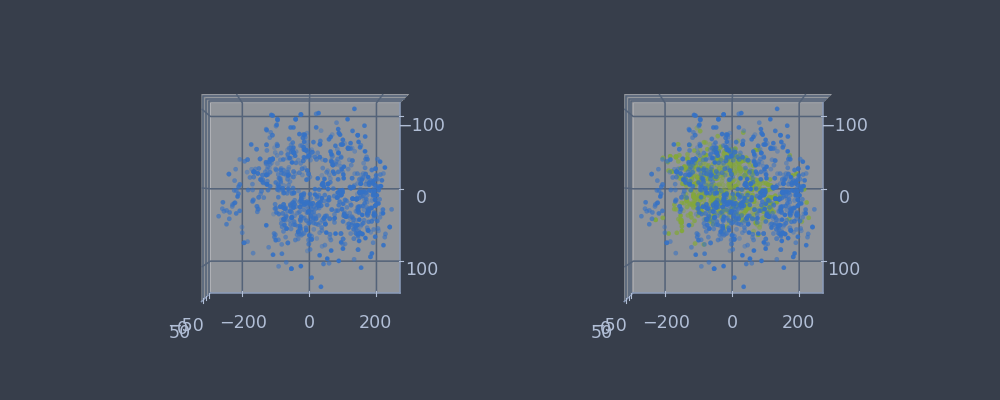

In [ ]:
%matplotlib widget
elev = 90
azim = 0
s = 10
# cell_type='epidermis'
cell_type=slice_A_sub.obs['Annotation_1_cell_type'].cat.categories[4]
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
ax.scatter(align_models[0][slice_A_sub.obs['Annotation_1_cell_type']==cell_type].obsm['align_spatial'][:,0],align_models[0][slice_A_sub.obs['Annotation_1_cell_type']==cell_type].obsm['align_spatial'][:,1],align_models[0][slice_A_sub.obs['Annotation_1_cell_type']==cell_type].obsm['align_spatial'][:,2],marker='o',s=s)

ax = fig.add_subplot(1,2,2,projection='3d')
ax.view_init(elev=elev, azim=azim)
ax.scatter(align_models[0][slice_A_sub.obs['Annotation_1_cell_type']==cell_type].obsm['align_spatial'][:,0],align_models[0][slice_A_sub.obs['Annotation_1_cell_type']==cell_type].obsm['align_spatial'][:,1],align_models[0][slice_A_sub.obs['Annotation_1_cell_type']==cell_type].obsm['align_spatial'][:,2],marker='o',s=s)
ax.scatter(align_models[1][slice_B_sub.obs['Annotation_1_cell_type']==cell_type].obsm['align_spatial'][:,0],align_models[1][slice_B_sub.obs['Annotation_1_cell_type']==cell_type].obsm['align_spatial'][:,1],align_models[1][slice_B_sub.obs['Annotation_1_cell_type']==cell_type].obsm['align_spatial'][:,2],marker='o',s=s)

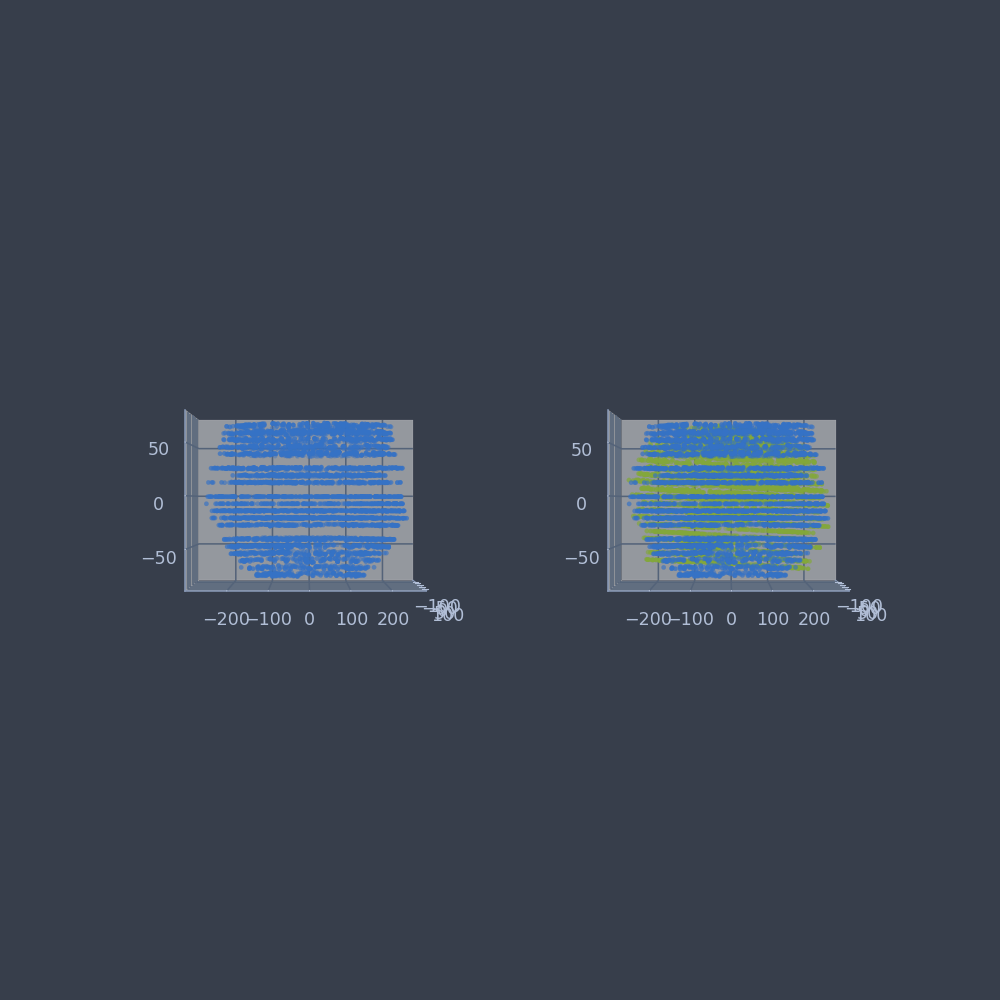

In [ ]:
%matplotlib widget
elev = 0
azim = 0
s = 10
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.view_init(elev=elev, azim=azim)
ax.scatter(align_models[0].obsm['align_spatial'][:,0],align_models[0].obsm['align_spatial'][:,1],align_models[0].obsm['align_spatial'][:,2],marker='o',s=s)

ax = fig.add_subplot(1,2,2,projection='3d')
ax.view_init(elev=elev, azim=azim)
ax.scatter(align_models[0].obsm['align_spatial'][:,0],align_models[0].obsm['align_spatial'][:,1],align_models[0].obsm['align_spatial'][:,2],marker='o',s=s)
ax.scatter(align_models[1].obsm['align_spatial'][:,0],align_models[1].obsm['align_spatial'][:,1],align_models[1].obsm['align_spatial'][:,2],marker='o',s=s)

In [ ]:
align_models

[AnnData object with n_obs × n_vars = 5000 × 6868
     obs: 'area', 'slices', 'Annotation_1_cell_type', 'Annotation_2_tissue', 'Annotation_3_germ_layer', 'actual_time'
     uns: '__type', 'latter_models_align'
     obsm: 'X_pca', 'X_umap', 'align_spatial', 'bbox', 'contour', 'spatial', 'tdr_spatial'
     layers: 'counts_X',
 AnnData object with n_obs × n_vars = 5000 × 8141
     obs: 'area', 'slices', 'Annotation_1_cell_type', 'Annotation_2_tissue', 'Annotation_3_germ_layer', 'actual_time'
     uns: '__type', 'former_models_align'
     obsm: '3d_align_spatial', 'align_spatial', 'bbox', 'before_3d_align_spatial', 'contour', 'spatial', 'tdr_spatial', 'tdr_spatial_zero'
     layers: 'counts_X', 'log1p_counts_X']

In [ ]:
slice_A.obsm['tdr_spatial']

array([[-1.67430827e+02,  1.17531133e+01, -6.62656640e+01],
       [-1.64235001e+02,  7.89689687e+00, -6.62656640e+01],
       [-1.63414232e+02,  1.55200658e+01, -6.62656640e+01],
       ...,
       [ 2.15804631e+02, -8.54138684e+00,  6.67343360e+01],
       [ 2.18044715e+02, -4.30617544e+00,  6.67343360e+01],
       [ 2.19129392e+02, -2.10124222e-01,  6.67343360e+01]])

In [ ]:
np.unique(slice_A.obsm['tdr_spatial'][:,-1])[0]

array([-66.26566397, -59.26566397, -52.26566397, -45.26566397,
       -38.26566397, -31.26566397, -24.26566397, -17.26566397,
       -10.26566397,  -3.26566397,   3.73433603,  10.73433603,
        17.73433603,  24.73433603,  31.73433603,  38.73433603,
        45.73433603,  52.73433603,  59.73433603,  66.73433603])

In [ ]:
slice_A.obsm['tdr_spatial'][:,0,slice_A.obsm['tdr_spatial'][:,-1]==np.unique(slice_A.obsm['tdr_spatial'][:,-1])[0]]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

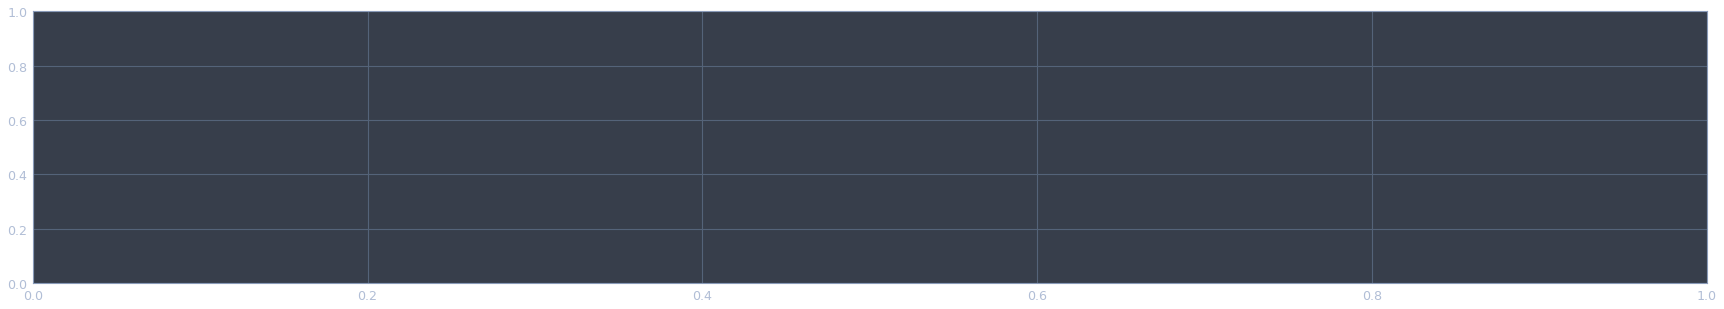

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1, 1,figsize=(30,5))
ax.scatter(slice_A.obsm['tdr_spatial'][:,0,slice_A.obsm['tdr_spatial'][:,-1]==np.unique(slice_A.obsm['tdr_spatial'][:,-1])[0]],slice_A.obsm['tdr_spatial'][:,1,slice_A.obsm['tdr_spatial'][:,-1]==np.unique(slice_A.obsm['tdr_spatial'][:,-1])[0]])

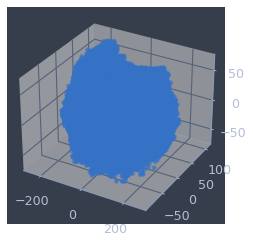

In [ ]:
%matplotlib inline
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(slice_A.obsm['tdr_spatial'][:,0],slice_A.obsm['tdr_spatial'][:,1],slice_A.obsm['tdr_spatial'][:,2])

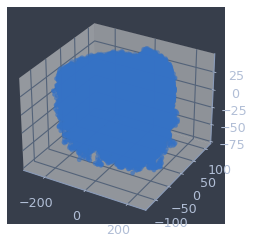

In [ ]:
%matplotlib inline
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(slice_B.obsm['tdr_spatial'][:,0],slice_B.obsm['tdr_spatial'][:,1],slice_B.obsm['tdr_spatial'][:,2])

In [ ]:
def plot_slices(sliceA_align, sliceB_align, axs, spatial_key, slice_colors,dot_size):
    xmin,xmax = np.min([np.min(sliceB_align.obsm[spatial_key][:,0]),np.min(sliceA_align.obsm[spatial_key][:,0])]),np.max([np.max(sliceB_align.obsm[spatial_key][:,0]),np.max(sliceA_align.obsm[spatial_key][:,0])])
    ymin,ymax = np.min([np.min(sliceB_align.obsm[spatial_key][:,1]),np.min(sliceA_align.obsm[spatial_key][:,1])]),np.max([np.max(sliceB_align.obsm[spatial_key][:,1]),np.max(sliceA_align.obsm[spatial_key][:,1])])
    # dot_size = 8
    margin = 20
    axs[0].scatter(sliceA_align.obsm[spatial_key][:,0],sliceA_align.obsm[spatial_key][:,1],s=dot_size,c=slice_colors[2])
    axs[0].set_xlim([xmin-margin,xmax+margin])
    axs[0].set_ylim([ymin-margin,ymax+margin])
    axs[0].axis('equal')
    axs[1].scatter(sliceB_align.obsm[spatial_key][:,0],sliceB_align.obsm[spatial_key][:,1],s=dot_size,c=slice_colors[2])
    axs[1].set_xlim([xmin-margin,xmax+margin])
    axs[1].set_ylim([ymin-margin,ymax+margin])
    axs[1].set_yticklabels([])
    axs[1].axis('equal')
    axs[2].scatter(sliceA_align.obsm[spatial_key][:,0],sliceA_align.obsm[spatial_key][:,1],s=dot_size,c=slice_colors[2])
    axs[2].scatter(sliceB_align.obsm[spatial_key][:,0],sliceB_align.obsm[spatial_key][:,1],s=dot_size,c=slice_colors[0])
    axs[2].set_xlim([xmin-margin,xmax+margin])
    axs[2].set_ylim([ymin-margin,ymax+margin])
    axs[2].set_yticklabels([])
    axs[2].axis('equal')

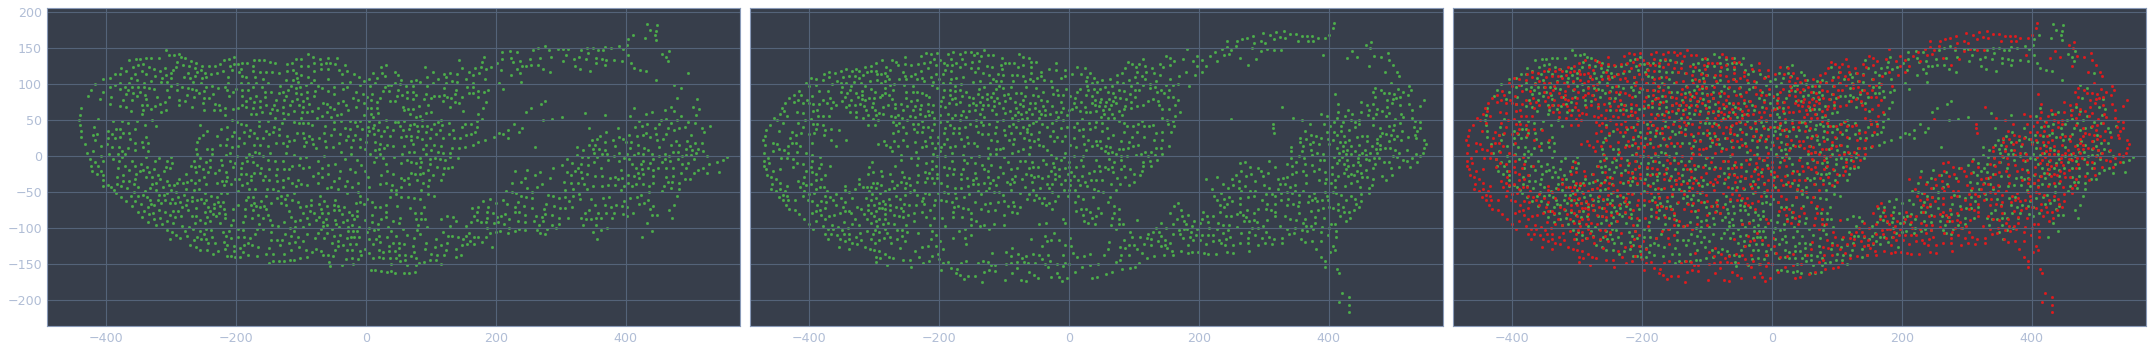

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1, 3,figsize=(30,5))
plot_slices(new_slices[0], new_slices[1],ax,'spatial',slice_colors)
plt.tight_layout()
plt.show()

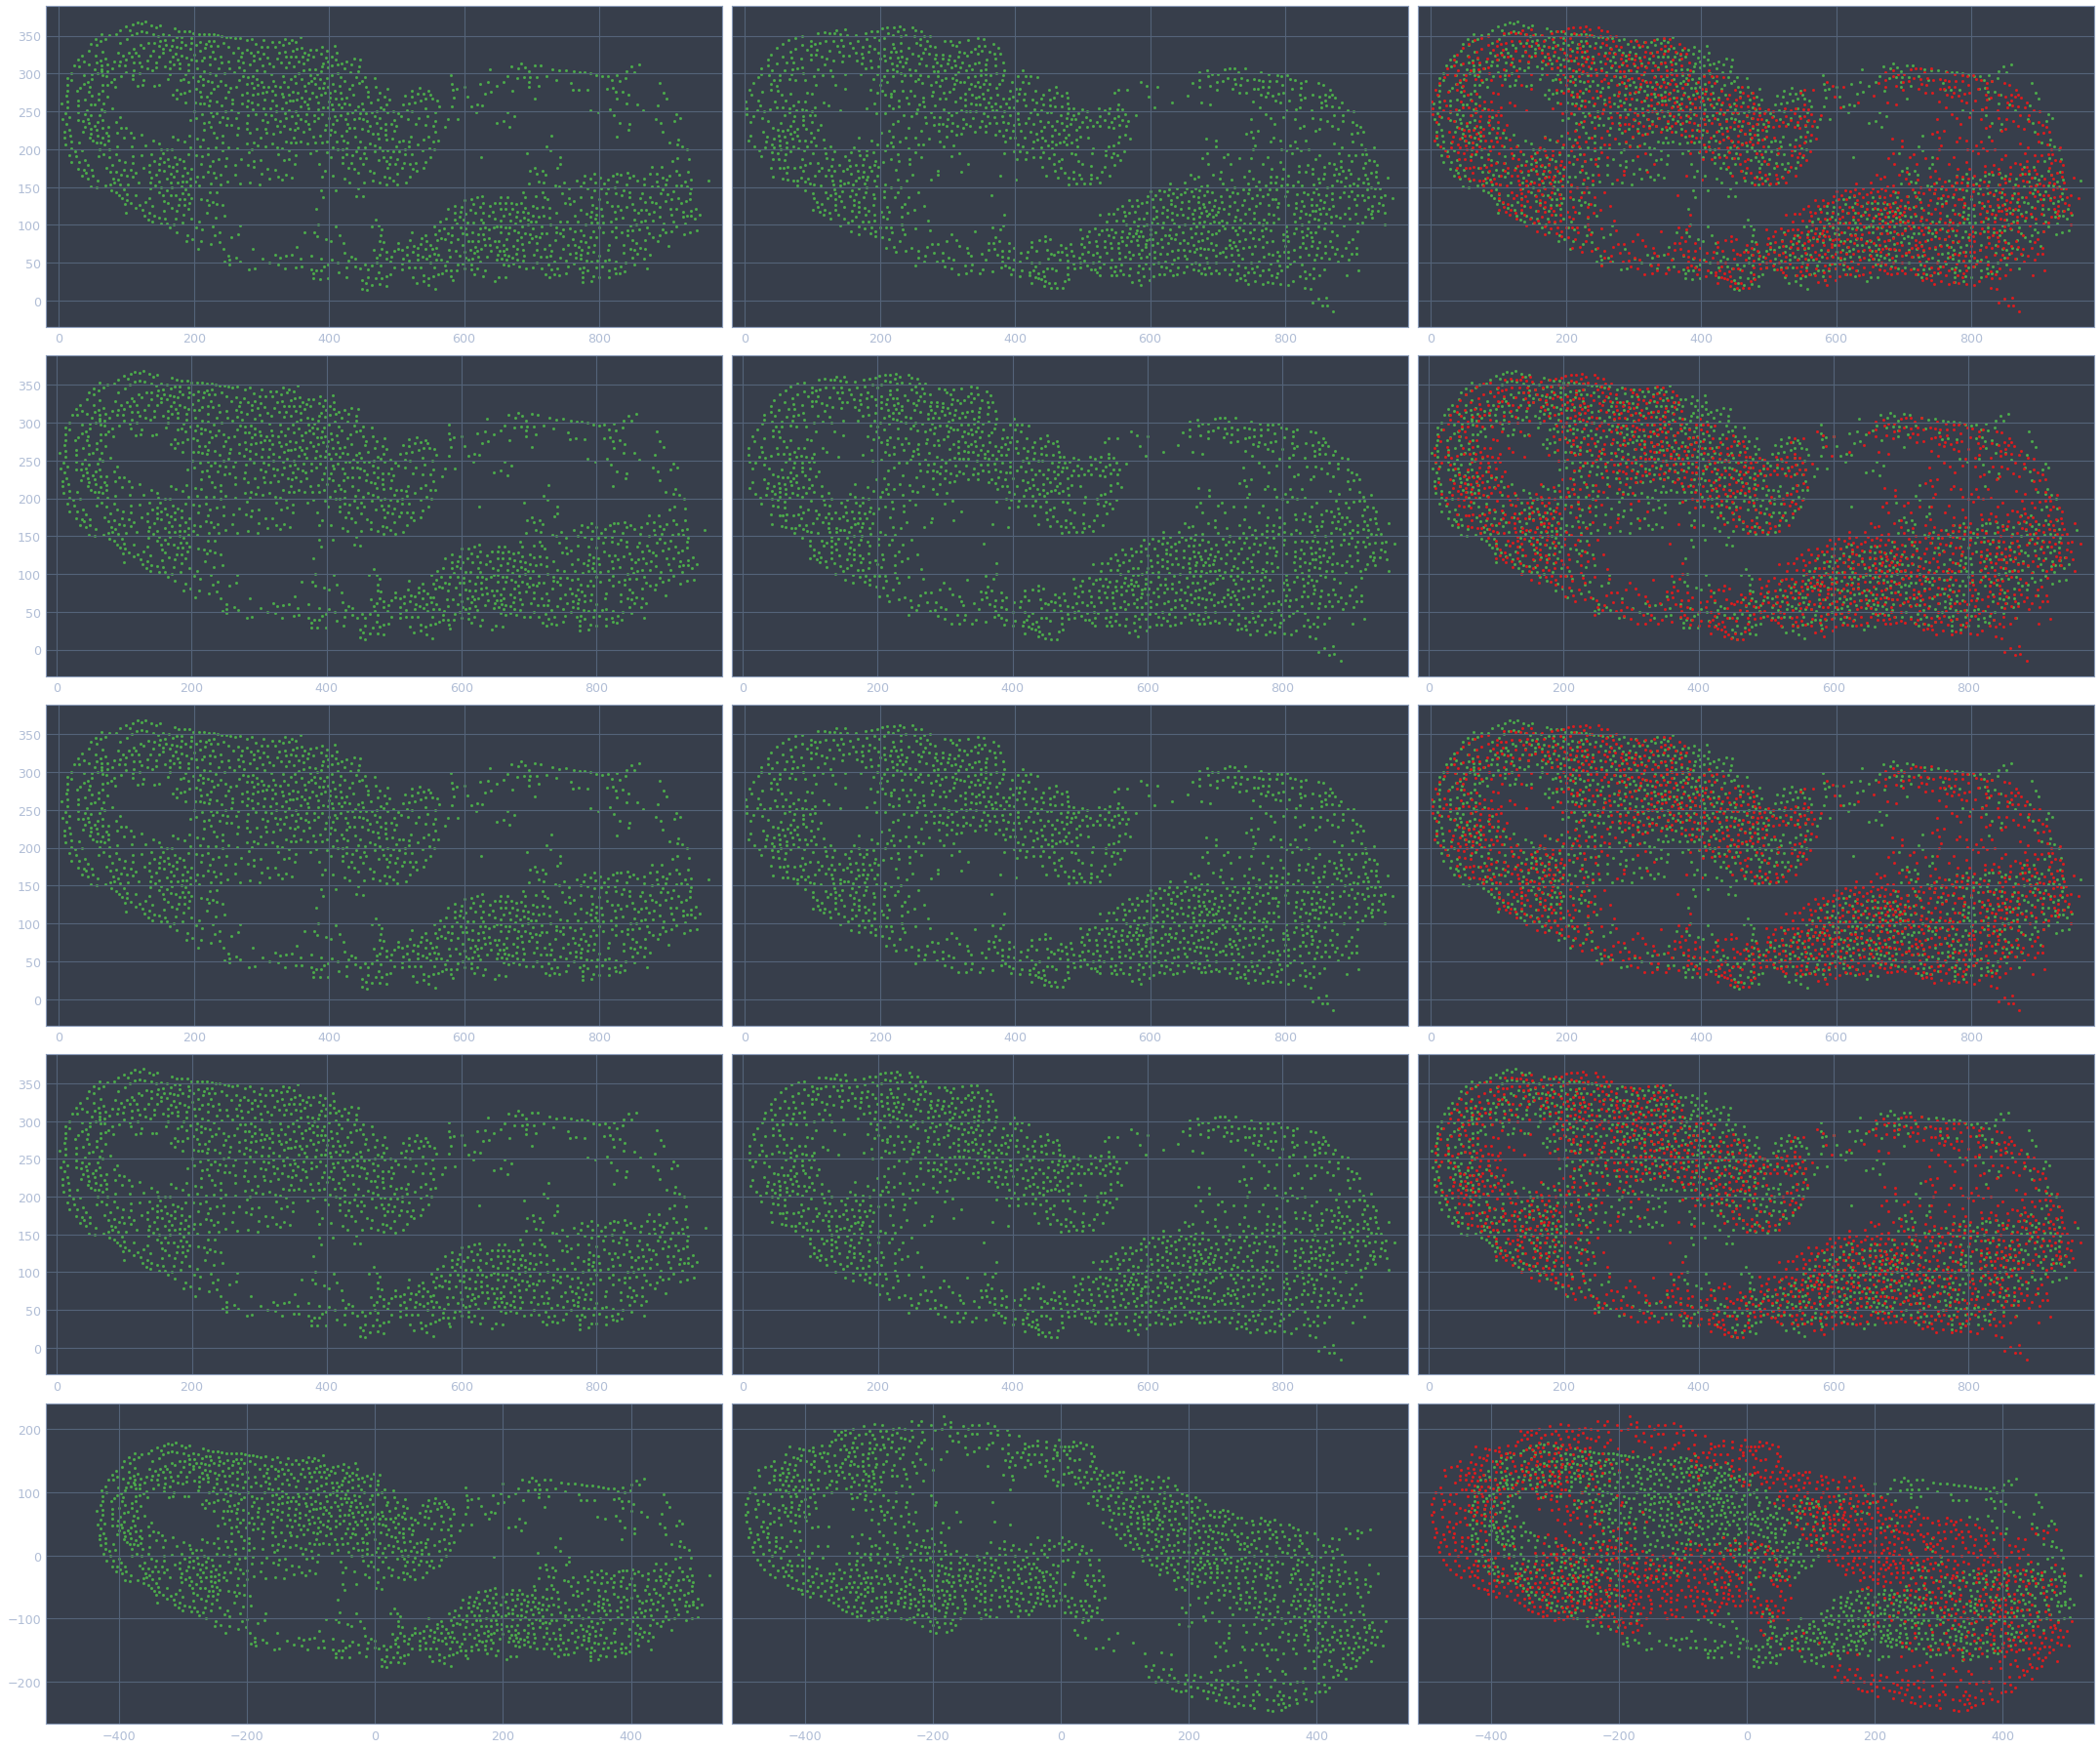

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(5, 3,figsize=(30,25))
plot_slices(sliceA_align, sliceB_align,axs[0],'align_spatial',slice_colors)
plot_slices(sliceA_align_SVI, sliceB_align_SVI,axs[1],'align_spatial',slice_colors)
plot_slices(sliceA_align_GPU, sliceB_align_GPU,axs[2],'align_spatial',slice_colors)
plot_slices(sliceA_align_GPU_SVI, sliceB_align_GPU_SVI,axs[3],'align_spatial',slice_colors)
plot_slices(new_slices[0], new_slices[1],axs[4],'spatial',slice_colors)
plt.tight_layout()
plt.show()

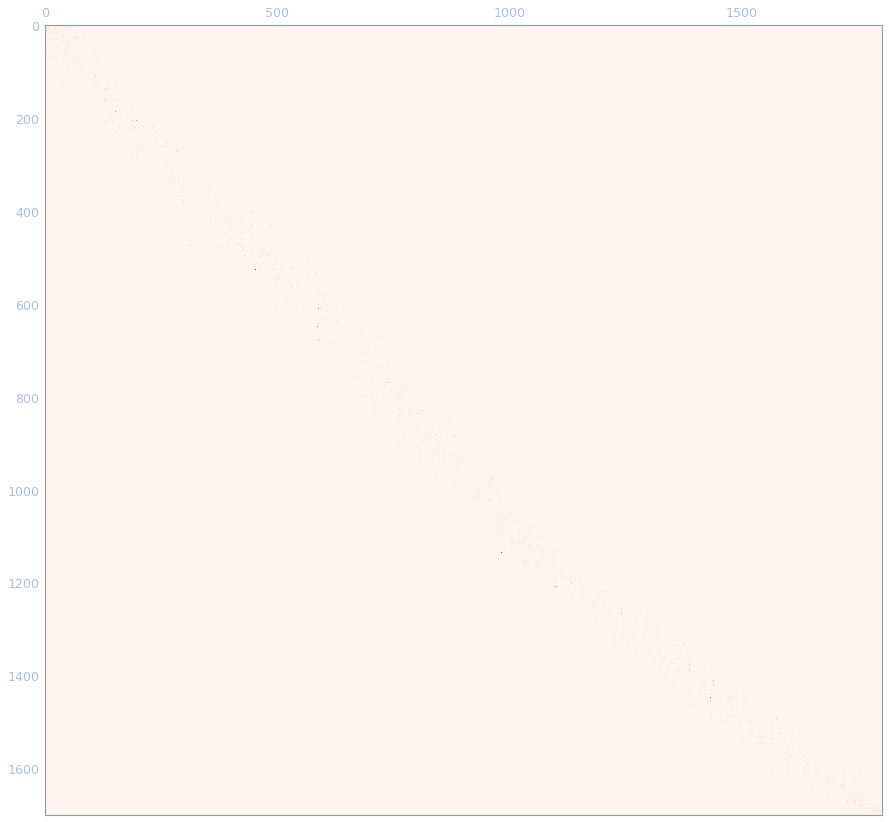

In [ ]:
%matplotlib inline
vis_P = P.T.copy()
vis_P = vis_P / np.max(vis_P)
fig, ax = plt.subplots(figsize=(15,15))
ax.matshow(vis_P, cmap="Reds")
# ax.axis('off')
ax.grid(False)
plt.show()

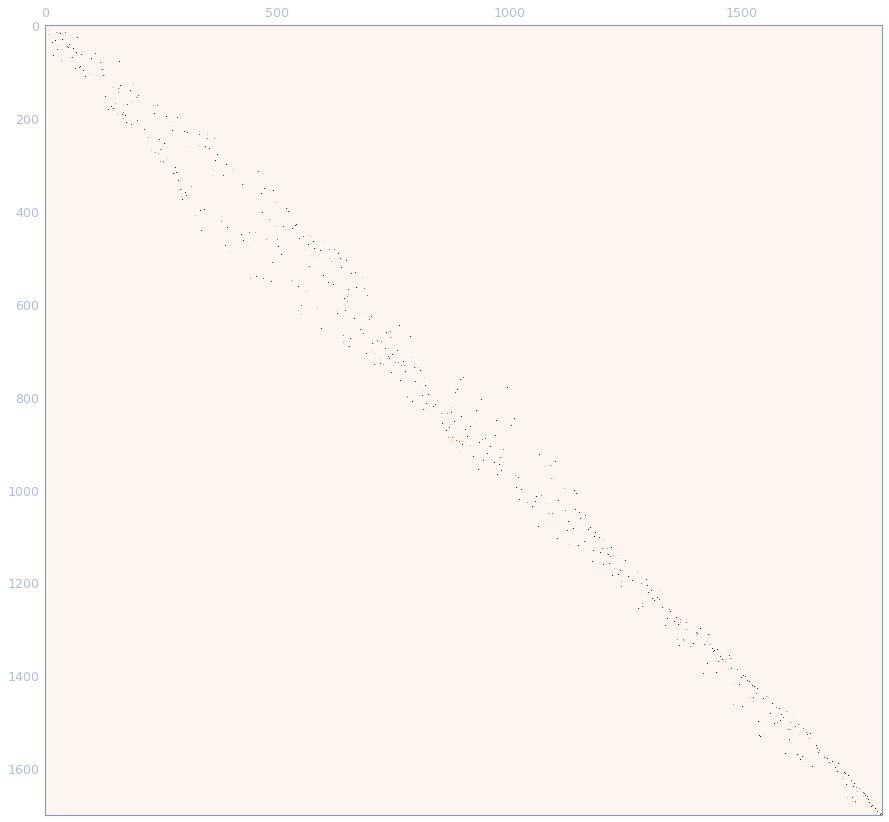

In [ ]:
%matplotlib inline
vis_P = pi.copy()
vis_P = vis_P / np.max(vis_P)
vis_P[vis_P < 0.05] = 0
fig, ax = plt.subplots(figsize=(15,15))
ax.matshow(vis_P, cmap="Reds")
ax.grid(False)
plt.show()